# Ground State Preparation of SU(2) Lattice Gauge Theory in Quantum Computer

[Kogut-Susskind Hamiltonian](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.11.395) for SU(2) Gauge Theory is:
$$
H = \frac{g^2}{2}\sum_{\rm links} (E_i^a)^2 - \frac{2}{a^2g^2} \sum_{\rm plaquettes} Z({\bf n}) \,,
$$
where, a in the denominator is the lattice spacing and in the superscript denotes SU(2) gauge group indices that are implicitly summer over, g is the gauge coupling constant with mass dimension $[g] = 0.5$ in 2+1 dimensions, $i = x$ or $y$ denotes spatial directions (implicitly summed), $\bf{n} = (n_x, n_y)$ is a a lattice point and $Z(\bf{n})$ is the plaquette operator, $E_i^a$ is the electric field along $i$th spatial direction associated with gauge group index $a$. 

**Mapping onto Spin Chain:**
The Hamiltonian of the SU(2) gauge theory on a plaquette chain with a basis truncated at $j=1/2$ can be mapped onto a quantum spin chain, shown in 
$$ H = \frac{3}{2}g^2\sum_{i=0}^{N-1}\frac{\sigma_i^z+1}{2} - \frac{3}{4}g^2\sum_{i=0}^{N-1}\frac{\sigma_i^z+1}{2}\frac{\sigma_{i+1}^z+1}{2} - \frac{2}{a^2g^2} \sum_{i=0}^{N-1} \big(-0.5\big)^{\frac{\sigma_{i-1}^z+\sigma_{i+1}^z+ 2}{2}}
\sigma_i^x \,.$$
Up to an irrelevant constant, this Hamiltonian can be rewritten as (see Ref. [1](https://arxiv.org/abs/2103.05179) and [2](https://arxiv.org/abs/2205.09247)} for a similar expression)
$$ H_{tot} = J \sum_{i=0}^{N-1}\sigma_i^z\sigma_{i+1}^z + h_z \sum_{i=0}^{N-1}\sigma_i^z + h_x \sum_{i=0}^{N-1} \frac{1-3\sigma_{i-1}^z}{4} \frac{1-3\sigma_{i+1}^z}{4} \sigma_i^x \, ,$$

That is,
$$ H_{tot} = J \sum_{i=0}^{N-1}\sigma_i^z\sigma_{i+1}^z + h_z \sum_{i=0}^{N-1}\sigma_i^z + \frac{h_x}{16} \sum_{i=0}^{N-1} ( \sigma_i^x - 3\sigma_{i-1}^z \sigma_i^x - 3\sigma_i^x\sigma_{i+1}^z + 9 \sigma_{i-1}^z \sigma_i^x \sigma_{i+1}^z )$$


where $J = -3 g^2/16$, $h_z=3 g^2/8$ and $h_x = -2/(ag)^2$. Under the **periodic boundary condition**, $\sigma_N^i=\sigma_0^i$. The Hamiltonian is rescaled to be unitless and so are the parameters $J$, $h_z$ and $h_x$.

**Interacting Ground State Preparation Protocol:**
We plan to use Adiabatic Evolution for the ground state preparation of the SU(2) gauge theory in the quantum computer.
Steps:
1. Start from the Ground State of the Electric Part ($H_{E} = J \sum_{i=0}^{N-1}\sigma_i^z\sigma_{i+1}^z + h_z \sum_{i=0}^{N-1}\sigma_i^z$) of the Hamiltonian (in Ising representation).
2. Turn on the adiabatic evolution (turn on magnetic field $H_B = \frac{h_x}{16} \sum_{i=0}^{N-1} ( \sigma_i^x - 3\sigma_{i-1}^z \sigma_i^x - 3\sigma_i^x\sigma_{i+1}^z + 9 \sigma_{i-1}^z \sigma_i^x \sigma_{i+1}^z$) slowly.


Later, we can find the ground state by diagonalizing the terms in H, and also perform classical numerical analysis to compare our result (ground state) from the adiabatic evolution with.

First, write a small scale code and make sure everything works.


For N = 10 (spin qubits), $H = H_E + H_B$, we have 

$H_{E} = J (\sigma_0^z \sigma_1^z + \sigma_1^z \sigma_2^z + \sigma_2^z \sigma_3^z + \sigma_3^z \sigma_4^z + \sigma_4^z \sigma_5^z + \sigma_5^z \sigma_6^z + \sigma_6^z \sigma_7^z + \sigma_7^z \sigma_8^z + \sigma_8^z \sigma_9^z + \sigma_9^z \sigma_0^z) + h_z (\sigma_0^z + \sigma_1^z + \sigma_2^z + \sigma_3^z + \sigma_4^z + \sigma_5^z + \sigma_6^z + \sigma_7^z + \sigma_8^z + \sigma_9^z) \, .$

Similarly, the magnetic part of the Hamiltonian is: $H_{B} = h_x \left( \frac{1 - 3\sigma_{-1}^z}{4} \frac{1 - 3\sigma_{1}^z}{4} \sigma_0^x + \frac{1 - 3\sigma_{0}^z}{4} \frac{1 - 3\sigma_{2}^z}{4} \sigma_1^x + \frac{1 - 3\sigma_{1}^z}{4} \frac{1 - 3\sigma_{3}^z}{4} \sigma_2^x + \frac{1 - 3\sigma_{2}^z}{4} \frac{1 - 3\sigma_{4}^z}{4} \sigma_3^x + \frac{1 - 3\sigma_{3}^z}{4} \frac{1 - 3\sigma_{5}^z}{4} \sigma_4^x + \frac{1 - 3\sigma_{4}^z}{4} \frac{1 - 3\sigma_{6}^z}{4} \sigma_5^x + \frac{1 - 3\sigma_{5}^z}{4} \frac{1 - 3\sigma_{7}^z}{4} \sigma_6^x + \frac{1 - 3\sigma_{6}^z}{4} \frac{1 - 3\sigma_{8}^z}{4} \sigma_7^x + \frac{1 - 3\sigma_{7}^z}{4} \frac{1 - 3\sigma_{9}^z}{4} \sigma_8^x + \frac{1 - 3\sigma_{8}^z}{4} \frac{1 - 3\sigma_{0}^z}{4} \sigma_9^x \right) \, .$

# Algorithm for the Interacting Ground State Preparation using Adiabatic Evolution

First we prepare the ground state of the $H_{E}$ as $\ket{\psi(0)}$. Then adiabatically evolve the state with the Hamiltonian $H(t) = (1 - t/T) H_E + (t/T) H_{tot}$ for large T such that we obtain ground state for $H_{tot}$ at the end.

That is to say, $ H(t) = (1-t/T) H_E + (t/T) (H_E + H_B)$ such that we obtain the ground state of the total Hamiltonian ($H_{tot}$) at the end of the adiabatic evolution. That is, we "adiabatically" evolve the known ground state $\ket{\psi(0)}$ of the electric hamiltonian, using the new Hamiltonian $H(t) = H_E + (t/T) H_B$. 

**According to the adiabatic theorem**, if the gap between the two lowest levels $E_1(s) - E_0(s) > 0$ (strictly greater than zero or strictly positive) for all $ 0 \le s = t/T \le 1$ such that $H(s) \ket{l; s} = E_l(s) \ket{l; s} $ with $E_0(s) \le E_1(s) \le ..... \le E_{N-1}(s)$ where $N$ is the dimension of the Hilbert Space. Suppose $\ket{psi(0)}$ is the ground state of $H(0)$, that is, $\ket{\psi(0)} = \ket{l = 0; s = 0}$. Then, according to the adiabatic theorem 

$$ \lim_{T \to \infty} |\braket{l = 0; s = 1|\psi(T)}| = 1 \, .$$

This means that the existence of a nonzero gap guarentees that $\psi(t)$ obeying $ i \frac{d \ket{\psi(t)}}{dt} = H(t) \ket{\psi(t)}$ remains very close to the instantaneous ground state of $H(t)$ of the form $H(t) = H_E + \left(\frac{t}{T}\right) H_B$ for all $t$ from $0$ to $T$ if T is big enough. Let's define the minimum gap by,

$$ \Delta E_{min} = \min_{0 \le s \le 1} (E_1(s) - E_0(s)) \, .$$

The adiabatic theorem tells us that taking 

$$ T \gg \frac{\varepsilon}{\Delta E_{min}^2}$$

where 

$$ \varepsilon = \max_{} |\braket{l = 1, s | \frac{dH}{ds}|l = 0; s} | $$

can make 

$$|\braket{l = 0, s = 1 | \psi(T) } |$$

arbitrarily close to 1. Since $\varepsilon$ is of order a typical eigenvalue of H and is not too big, so the size of $T$ is governed by $\Delta E^2_{min}$. 

**Initialize the Library, Parameters**

In [2]:
# ## INSTALLATIONS REQUIRED
# !pip install qiskit[visualization]==1.1.0
# !pip install qiskit_aer
# !pip install qiskit qiskit-aer
# !pip install scipy
# !pip install numpy
# !pip install matplotlib
# !pip install qiskit-ibm-runtime
# !pip install -U sympy
# !pip install distinctipy
# !pip install pylatexenc
# !pip install prototype-zne

# !pip install tenpy #Density Matrix Renormalization Group (DMRG with python)

In [3]:
import qiskit
qiskit.__version__

'1.1.1'

In [164]:
#import necessary libraries
import numpy as np
import scipy.linalg as LA
from scipy.linalg import eig, eigh
from scipy.integrate import solve_ivp
from qiskit import *
import matplotlib.pyplot as plt
import distinctipy
import matplotlib.ticker as ticker
from qiskit.quantum_info import Pauli, SparsePauliOp
from qiskit.quantum_info import Statevector
from qiskit.visualization import state_visualization
from qiskit.circuit import QuantumCircuit, Parameter
import qiskit.quantum_info as qi
from qiskit.visualization import plot_histogram, plot_state_city
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
# Accepts shots (stat error): https://docs.quantum.ibm.com/api/qiskit/qiskit.primitives.Estimator
from qiskit_aer import AerSimulator
from qiskit.primitives import Estimator 
# Noise and Noiseless: https://docs.quantum.ibm.com/guides/simulate-with-qiskit-aer
from qiskit_aer.primitives import EstimatorV2 as AerEstimator
# real hardware
from qiskit_ibm_runtime import EstimatorV2

## Step 1: Known Ground State Preparation for Electric Hamiltonian $H_E$

Taking N = 10, first prepare a ground state (can be made easily) for the electric part of the hamiltonian:
$H_{E} = J (\sigma_0^z \sigma_1^z + \sigma_1^z \sigma_2^z + \sigma_2^z \sigma_3^z + \sigma_3^z \sigma_4^z + \sigma_4^z \sigma_5^z + \sigma_5^z \sigma_6^z + \sigma_6^z \sigma_7^z + \sigma_7^z \sigma_8^z + \sigma_8^z \sigma_9^z + \sigma_9^z \sigma_0^z) + h_z (\sigma_0^z + \sigma_1^z + \sigma_2^z + \sigma_3^z + \sigma_4^z + \sigma_5^z + \sigma_6^z + \sigma_7^z + \sigma_8^z + \sigma_9^z)$

**Note:** $\sigma^z \ket{0} = (+1) \ket{0}$ and $\sigma^z \ket{1} = (-1) \ket{1}$ where (up) $\ket{0} = \begin{pmatrix} 1 \\ 0 \end{pmatrix}$, (down) $\ket{1} = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$ and $\sigma^z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$.
Similarly, $\sigma^x \ket{0} = \ket{1}$ and $\sigma^x \ket{1} = \ket{0}$ where $\sigma^x = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$.


For N = 10 spin qubits, the ground state of the electric hamiltonian $H_E$:

When all spin up $\ket{0000000000}$, $E_E = 10J + 10 h_z$ as the product $\sigma_i^z \sigma_{i+1}^z$ term in the Hamiltonian will give $(+1) \times (+1) = +1$ each, and the linear term $\sigma_i^z$ would give $(+1)$ each.

When all spin down $\ket{1111111111}$, $E_E = 10 J - 10 h_z$ as the product $\sigma_i^z \sigma_{i+1}^z$ in the Hamiltonian will give $(-1) \times (-1) = +1$ each, and the linear term $\sigma_i^z$ would give $(-1)$ each.

When the spins are alternatly up and down $\ket{0101010101}$ or $\ket{1010101010}$, the energy is $E_E = - 10 J$ as the contribution from the linear term ($\sigma_i^z$) cancels.

*Since, J is negative, $\ket{\psi_0} = \ket{1111111111}$ would yield the least energy and so is the ground state of the electric part ($H_E$) of the total hamiltonian.*

In [165]:
# create the known ground state (electric hamiltonian)
def known_gs(N):
    circ = QuantumCircuit(N) #all in 0 states
    for i in range(N):
        circ.x(i) #all 1 states #all down
    circ.barrier()
    psi_known_gs = qi.Statevector.from_instruction(circ) # Quantum Index    
  
    return circ, psi_known_gs

#### Hamiltonian & Hamiltonian Density

Total Hamiltonian is: $H = H_E + H_B$ where,

Electric Hamiltonian:
$H_{E} = J \sum_{i=0}^{N-1}\sigma_i^z\sigma_{i+1}^z + h_z \sum_{i=0}^{N-1}\sigma_i^z$


Magnetic Hamiltonian:
$H_B = \frac{h_x}{16} \sum_{i=0}^{N-1} ( \sigma_i^x - 3\sigma_{i-1}^z \sigma_i^x - 3\sigma_i^x\sigma_{i+1}^z + 9 \sigma_{i-1}^z \sigma_i^x \sigma_{i+1}^z )$

Now, let us define the hamiltonian denstiy as,
$ H_i = h_z Z_i + J/2 (Z_i Z_{i+1} + Z_{i-1} Z_i) + hx/16 * (X_i - 3 Z_{i-1} X_i - 3 X_i Z_{i+1} + 9 Z_{i-1} X_i Z_{i+1}) $

Under the **periodic boundary condition**, $\sigma_N^i=\sigma_0^i$.

Under the **open boundary condition**, we keep the edge terms open.

In [166]:
### HAMILTONIAN WITH PERIODIC BOUNDARY CONDITIONS

#Create the electric part of the Hamiltonian
def hamiltonian_elec(N, J, hz):
    """
    Constructs the electronic part of the Hamiltonian H_E for a system of N spins.

    Parameters: 
    N (int): Number of spins
    J (float): constant
    hz (float): another constant

    Returns:
    SparsePauliOp: SparsePauliOp object representing the electronic part of the Hamiltonian
    """
    pauli_list = []
    coeffs = []
    
    # Constructing the linear terms hz * sum(sigma_i^z)
    for i in range(N):
        z_term = ['I'] * N
        z_term[i] = 'Z'
        pauli_list.append(Pauli(''.join(z_term))) 
        coeffs.append(hz)
    
    # Constructing the interaction terms J * sum(sigma_i^z * sigma_{i+1}^z)
    for i in range(N):
        z_term = ['I'] * N
        z_term[i] = 'Z'
        z_term[(i + 1) % N] = 'Z'
        pauli_list.append(Pauli(''.join(z_term))) 
        coeffs.append(J)
    
    # Create SparsePauliOp for the Hamiltonian
    H_E = SparsePauliOp(pauli_list, coeffs)

    return H_E.simplify()


## magnetic hamiltonian
def hamiltonian_mag(N, hx):
    """
    Constructs the magnetic part of the Hamiltonian H_B for a system of N spins.
    
    Parameters:
    N (int): Number of spins
    hx (float): Constant parameter hx

    Returns:
    SparsePauliOp: SparsePauliOp object representing the magnetic part of the Hamiltonian
    """
    pauli_list = []
    coeffs = []

    factor = hx / 16

    for i in range(N):
        # Term: sigma_i^x
        x_term = ['I'] * N
        x_term[i] = 'X'
        pauli_list.append(Pauli(''.join(x_term)))
        coeffs.append(factor)

        # Term: -3 * sigma_{i-1}^z * sigma_i^x
        zx_term = ['I'] * N
        zx_term[(i-1) % N] = 'Z'
        zx_term[i] = 'X'
        pauli_list.append(Pauli(''.join(zx_term)))
        coeffs.append(-3 * factor)

        # Term: -3 * sigma_i^x * sigma_{i+1}^z
        xz_term = ['I'] * N
        xz_term[i] = 'X'
        xz_term[(i+1) % N] = 'Z' #periodic boundary condition (imposed by % sign)
        pauli_list.append(Pauli(''.join(xz_term)))
        coeffs.append(-3 * factor)

        # Term: 9 * sigma_{i-1}^z * sigma_i^x * sigma_{i+1}^z
        zxz_term = ['I'] * N
        zxz_term[(i-1) % N] = 'Z'
        zxz_term[i] = 'X'
        zxz_term[(i+1) % N] = 'Z'
        pauli_list.append(Pauli(''.join(zxz_term)))
        coeffs.append(9 * factor)

    # Create SparsePauliOp for the Hamiltonian
    H_B = SparsePauliOp(pauli_list, coeffs)

    return H_B.simplify()


# Define the local Hamiltonian density operator: Periodic Boundary Condition
def hamiltonian_density(i, J, hz, hx, N):
    """
    Constructs the Hamiltonian density operator for a single site i.

    Parameters: 
    i (int): Site index
    J (float): constant
    hz (float): another constant
    hx (float): another constant
    N (int): Number of spins

    Returns:
    SparsePauliOp: SparsePauliOp object representing the Hamiltonian density for site i
    """
    pauli_list = []
    coeffs = []
    
    # Term: hz * Z_i
    z_term = ['I'] * N
    z_term[i] = 'Z'
    pauli_list.append(Pauli(''.join(z_term)))
    coeffs.append(hz)

    # Term: J/2 * (Z_i Z_{i+1} + Z_{i-1} Z_i)
    zz_term_1 = ['I'] * N
    zz_term_1[i] = 'Z'
    zz_term_1[(i + 1) % N] = 'Z'
    pauli_list.append(Pauli(''.join(zz_term_1)))
    coeffs.append(J / 2)  
    zz_term_2 = ['I'] * N
    zz_term_2[(i - 1) % N] = 'Z'
    zz_term_2[i] = 'Z'
    pauli_list.append(Pauli(''.join(zz_term_2)))
    coeffs.append(J / 2)

    # # Term: J * Z_i Z_{i+1}
    # zz_term = ['I'] * N
    # zz_term[i] = 'Z'
    # zz_term[(i + 1) % N] = 'Z'
    # pauli_list.append(Pauli(''.join(zz_term)))
    # coeffs.append(J)  

    # Term: hx/16 * X_i 
    x_term = ['I'] * N
    x_term[i] = 'X'
    pauli_list.append(Pauli(''.join(x_term)))
    coeffs.append(hx / 16)

    # Term: (- 3 * hx/16) * Z_{i-1}  X_i 
    zx_term = ['I'] * N
    zx_term[(i - 1) % N] = 'Z'
    zx_term[i] = 'X'
    pauli_list.append(Pauli(''.join(zx_term)))
    coeffs.append(-3 * hx / 16)

    # Term: (- 3 * hx / 16) X_i Z_{i+1} 
    xz_term = ['I'] * N
    xz_term[i] = 'X'
    xz_term[(i + 1) % N] = 'Z'
    pauli_list.append(Pauli(''.join(xz_term)))
    coeffs.append(-3 * hx / 16)

    # Term: (9*hx / 16) Z_{i-1} X_i Z_{i+1})
    zxz_term = ['I'] * N
    zxz_term[(i - 1) % N] = 'Z'
    zxz_term[i] = 'X'
    zxz_term[(i + 1) % N] = 'Z'
    pauli_list.append(Pauli(''.join(zxz_term)))
    coeffs.append(9 * hx / 16)

    # Create SparsePauliOp for the Hamiltonian density
    H_density = SparsePauliOp(pauli_list, coeffs)

    return H_density

In [167]:
### HAMILTONIANS WITH OPEN BOUNDARY CONDITIONS

# Create the electric part of the Hamiltonian with open boundary conditions
def hamiltonian_elec_open(N, J, hz):
    """
    Constructs the electronic part of the Hamiltonian H_E for a system of N spins with open boundary conditions.

    Parameters: 
    N (int): Number of spins
    J (float): Coupling constant
    hz (float): Magnetic field in the z direction

    Returns:
    SparsePauliOp: SparsePauliOp object representing the electronic part of the Hamiltonian
    """
    pauli_list = []
    coeffs = []
    
    # Constructing the interaction terms J * sum(sigma_i^z * sigma_{i+1}^z)
    for i in range(N - 1):  # Change N to N-1 to avoid wrapping around
        z_term = ['I'] * N
        z_term[i] = 'Z'
        z_term[i + 1] = 'Z'
        pauli_list.append(Pauli(''.join(z_term)))  # In reverse order to match the order of Pauli
        coeffs.append(J)
    
    # Constructing the linear terms hz * sum(sigma_i^z)
    for i in range(N):
        z_term = ['I'] * N
        z_term[i] = 'Z'
        pauli_list.append(Pauli(''.join(z_term)))  # In reverse order to match the order of Pauli
        coeffs.append(hz)
    
    # Create SparsePauliOp for the Hamiltonian
    H_E = SparsePauliOp(pauli_list, coeffs)

    return H_E.simplify()

# Create the magnetic part of the Hamiltonian with open boundary conditions
def hamiltonian_mag_open(N, hx):
    """
    Constructs the magnetic part of the Hamiltonian H_B for a system of N spins with open boundary conditions.
    
    Parameters:
    N (int): Number of spins
    hx (float): Coupling constant

    Returns:
    SparsePauliOp: SparsePauliOp object representing the magnetic part of the Hamiltonian
    """
    pauli_list = []
    coeffs = []

    factor = hx / 16

    for i in range(N):
        # Term: sigma_i^x
        x_term = ['I'] * N
        x_term[i] = 'X'
        pauli_list.append(Pauli(''.join(x_term)))
        coeffs.append(factor)

        # Term: -3 * sigma_{i-1}^z * sigma_i^x (for i > 0)
        if i > 0:
            zx_term = ['I'] * N
            zx_term[i - 1] = 'Z'
            zx_term[i] = 'X'
            pauli_list.append(Pauli(''.join(zx_term)))
            coeffs.append(-3 * factor)

        # Term: -3 * sigma_i^x * sigma_{i+1}^z (for i < N - 1)
        if i < N - 1:
            xz_term = ['I'] * N
            xz_term[i] = 'X'
            xz_term[i + 1] = 'Z'
            pauli_list.append(Pauli(''.join(xz_term)))
            coeffs.append(-3 * factor)

        # Term: 9 * sigma_{i-1}^z * sigma_i^x * sigma_{i+1}^z (for i > 0 and i < N - 1)
        if i > 0 and i < N - 1:
            zxz_term = ['I'] * N
            zxz_term[i - 1] = 'Z'
            zxz_term[i] = 'X'
            zxz_term[i + 1] = 'Z'
            pauli_list.append(Pauli(''.join(zxz_term)))
            coeffs.append(9 * factor)

    # Create SparsePauliOp for the Hamiltonian
    H_B = SparsePauliOp(pauli_list, coeffs)

    return H_B.simplify()

# # Define the local Hamiltonian density operator: Open Boundary Condition
def hamiltonian_density_open(i, J, hz, hx, N):
    """
    Constructs the Hamiltonian density operator for a single site i.

    Parameters: 
    i (int): Site index
    J (float): constant
    hz (float): another constant
    hx (float): another constant
    N (int): Number of spins

    Returns:
    SparsePauliOp: SparsePauliOp object representing the Hamiltonian density for site i
    """
    pauli_list = []
    coeffs = []
    
    # Term: hz * Z_i
    z_term = ['I'] * N
    z_term[i] = 'Z'
    pauli_list.append(Pauli(''.join(z_term)))
    coeffs.append(hz)

    # Term: J/2 * Z_i Z_{i+1} (for i < N - 1)
    if i < N - 1:
        zz_term_1 = ['I'] * N
        zz_term_1[i] = 'Z'
        zz_term_1[i + 1] = 'Z'
        pauli_list.append(Pauli(''.join(zz_term_1)))
        coeffs.append(J / 2)

    # Term: J/2 * Z_{i-1} Z_i (for i > 0)
    if i > 0:
        zz_term_2 = ['I'] * N
        zz_term_2[i - 1] = 'Z'
        zz_term_2[i] = 'Z'
        pauli_list.append(Pauli(''.join(zz_term_2)))
        coeffs.append(J / 2)

    # Term: hx/16 * X_i 
    x_term = ['I'] * N
    x_term[i] = 'X'
    pauli_list.append(Pauli(''.join(x_term)))
    coeffs.append(hx / 16)

    # Term: (-3 * hx/16) * Z_{i-1} X_i (for i > 0)
    if i > 0:
        zx_term = ['I'] * N
        zx_term[i - 1] = 'Z'
        zx_term[i] = 'X'
        pauli_list.append(Pauli(''.join(zx_term)))
        coeffs.append(-3 * hx / 16)

    # Term: (-3 * hx/16) * X_i Z_{i+1} (for i < N - 1)
    if i < N - 1:
        xz_term = ['I'] * N
        xz_term[i] = 'X'
        xz_term[i + 1] = 'Z'
        pauli_list.append(Pauli(''.join(xz_term)))
        coeffs.append(-3 * hx / 16)

    # Term: (9 * hx/16) * Z_{i-1} X_i Z_{i+1} (for i > 0 and i < N - 1)
    if i > 0 and i < N - 1:
        zxz_term = ['I'] * N
        zxz_term[i - 1] = 'Z'
        zxz_term[i] = 'X'
        zxz_term[i + 1] = 'Z'
        pauli_list.append(Pauli(''.join(zxz_term)))
        coeffs.append(9 * hx / 16)
        
    # Create SparsePauliOp for the Hamiltonian density
    H_density = SparsePauliOp(pauli_list, coeffs)

    return H_density

In [168]:
### TESTING THE HAMILTONIANS AND HAMILTONIAN DENSITIES ####

### Define constants
N = 3  # Number of spins
a = 1.0  # Lattice spacing

# coupling constants 
g = 1.0

# Calculate Hamiltonian parameters
J = -3 * g**2 / 16
hz = 3 * g**2 / 8
hx = -2 / (a * g)**2    

## Calculate Hamiltonians
# electric Hamiltonian
H_E_pbc = hamiltonian_elec(N, J, hz)
H_E_open = hamiltonian_elec_open(N, J, hz)
# magnetic Hamiltonian
H_M_pbc = hamiltonian_mag(N, hx)
H_M_open = hamiltonian_mag_open(N, hx)

# Total Hamiltonian
H_tot_pbc = H_E_pbc + H_M_pbc
H_tot_open = H_E_open + H_M_open

# # Output
# print("="*50)
# print(f"Electric Hamiltonian (PBC): {H_E_pbc}")
# # print("="*50)
# # print(f"Electric Hamiltonian (Open): {H_E_open}")
# print("="*50)
# print(f"Magnetic Hamiltonian (PBC): {H_M_pbc}")
# # print("="*50)
# # print(f"Magnetic Hamiltonian (Open): {H_M_open}")
# print("="*50)
# print(f"Total Hamiltonian (PBC): {H_tot_pbc}")
# print("="*50)
# # print(f"Total Hamiltonian (Open): {H_tot_open}")
# # print("="*50)

## Calculate Hamiltonian Density
for i in range(N):
    ham_den_pbc = hamiltonian_density(i, J, hz, hx, N)
    ham_den_open = hamiltonian_density_open(i, J, hz, hx, N)
    print("="*50)
    print(f"Hamiltonian Density (PBC) at {i}-Site : {ham_den_pbc}")
    print("="*50)
    # print(f"Hamiltonian Density (Open) at {i}-Site : {ham_den_open}")
    # print("="*50)

Hamiltonian Density (PBC) at 0-Site : SparsePauliOp(['ZII', 'ZZI', 'ZIZ', 'XII', 'XIZ', 'XZI', 'XZZ'],
              coeffs=[ 0.375  +0.j, -0.09375+0.j, -0.09375+0.j, -0.125  +0.j,  0.375  +0.j,
  0.375  +0.j, -1.125  +0.j])
Hamiltonian Density (PBC) at 1-Site : SparsePauliOp(['IZI', 'IZZ', 'ZZI', 'IXI', 'ZXI', 'IXZ', 'ZXZ'],
              coeffs=[ 0.375  +0.j, -0.09375+0.j, -0.09375+0.j, -0.125  +0.j,  0.375  +0.j,
  0.375  +0.j, -1.125  +0.j])
Hamiltonian Density (PBC) at 2-Site : SparsePauliOp(['IIZ', 'ZIZ', 'IZZ', 'IIX', 'IZX', 'ZIX', 'ZZX'],
              coeffs=[ 0.375  +0.j, -0.09375+0.j, -0.09375+0.j, -0.125  +0.j,  0.375  +0.j,
  0.375  +0.j, -1.125  +0.j])


In [169]:
### TESTING THE HAMILTONIANS AND HAMILTONIAN DENSITIES ####

### Define constants
N = 4  # Number of spins
a = 1.0  # Lattice spacing

# coupling constants 
g = 1.0

# Calculate Hamiltonian parameters
J = -3 * g**2 / 16
hz = 3 * g**2 / 8
hx = -2 / (a * g)**2    

## Calculate Hamiltonians
# electric Hamiltonian
H_E_pbc = hamiltonian_elec(N, J, hz)
H_E_open = hamiltonian_elec_open(N, J, hz)
# magnetic Hamiltonian
H_M_pbc = hamiltonian_mag(N, hx)
H_M_open = hamiltonian_mag_open(N, hx)

# Total Hamiltonian
H_tot_pbc = H_E_pbc + H_M_pbc
H_tot_open = H_E_open + H_M_open

# Output
print("="*50)
print(f"Electric Hamiltonian (PBC): {H_E_pbc}")
# print("="*50)
# print(f"Electric Hamiltonian (Open): {H_E_open}")
print("="*50)
print(f"Magnetic Hamiltonian (PBC): {H_M_pbc}")
# print("="*50)
# print(f"Magnetic Hamiltonian (Open): {H_M_open}")
print("="*50)
print(f"Total Hamiltonian (PBC): {H_tot_pbc}")
print("="*50)
# print(f"Total Hamiltonian (Open): {H_tot_open}")
# print("="*50)

## Calculate Hamiltonian Density
for i in range(N):
    ham_den_pbc = hamiltonian_density(i, J, hz, hx, N)
    ham_den_open = hamiltonian_density_open(i, J, hz, hx, N)
    print("="*50)
    print(f"Hamiltonian Density (PBC) at {i}-Site : {ham_den_pbc}")
    print("="*50)
    print(f"Hamiltonian Density (Open) at {i}-Site : {ham_den_open}")
    print("="*50)

Electric Hamiltonian (PBC): SparsePauliOp(['ZIII', 'IZII', 'IIZI', 'IIIZ', 'ZZII', 'IZZI', 'IIZZ', 'ZIIZ'],
              coeffs=[ 0.375 +0.j,  0.375 +0.j,  0.375 +0.j,  0.375 +0.j, -0.1875+0.j,
 -0.1875+0.j, -0.1875+0.j, -0.1875+0.j])
Magnetic Hamiltonian (PBC): SparsePauliOp(['XIII', 'XIIZ', 'XZII', 'XZIZ', 'IXII', 'ZXII', 'IXZI', 'ZXZI', 'IIXI', 'IZXI', 'IIXZ', 'IZXZ', 'IIIX', 'IIZX', 'ZIIX', 'ZIZX'],
              coeffs=[-0.125+0.j,  0.375+0.j,  0.375+0.j, -1.125+0.j, -0.125+0.j,  0.375+0.j,
  0.375+0.j, -1.125+0.j, -0.125+0.j,  0.375+0.j,  0.375+0.j, -1.125+0.j,
 -0.125+0.j,  0.375+0.j,  0.375+0.j, -1.125+0.j])
Total Hamiltonian (PBC): SparsePauliOp(['ZIII', 'IZII', 'IIZI', 'IIIZ', 'ZZII', 'IZZI', 'IIZZ', 'ZIIZ', 'XIII', 'XIIZ', 'XZII', 'XZIZ', 'IXII', 'ZXII', 'IXZI', 'ZXZI', 'IIXI', 'IZXI', 'IIXZ', 'IZXZ', 'IIIX', 'IIZX', 'ZIIX', 'ZIZX'],
              coeffs=[ 0.375 +0.j,  0.375 +0.j,  0.375 +0.j,  0.375 +0.j, -0.1875+0.j,
 -0.1875+0.j, -0.1875+0.j, -0.1875+0.j, -0.125 +0.j,  0

#### Exact Ground State (using scipy.linalg.eigh) & Overlap Calculation

In [170]:
### FIND EXACT GROUND STATE OF THE HAMILTONIAN ###
def exact_ground_state(H):
    """
    Find the exact ground state of the Hamiltonian H.

    Parameters:
    - H: The Hamiltonian operator.

    Returns:
    - eigenvals: all the eigenvalues of H
    - eigenvecs: all the eigenvectors of H
    - energy_realgs: The ground state energy.
    - psi_realgs: The ground state vector.
    """

    # Compute Hamiltonian matrix
    H_matrix = H.to_matrix()  # H is a qiskit operator (defined above)

    # Classical ground state calculation (real GS) using scipy.linalg.eigh
    #eigenvals, eigenvecs = eig(H_matrix,right=True)   
    eigenvals, eigenvecs = eigh(H_matrix)
    
    # Find the ground state (eigenvector with the smallest eigenvalue)
    index_gs = np.argmin(eigenvals)
    energy_realgs = eigenvals[index_gs]
    psi_realgs = eigenvecs[:,index_gs] # Extract the eigenvector (column) corresponding to the smallest eigenvalue
    '''Return the eigenvalues and eigenvectors of a complex Hermitian (conjugate symmetric) 
    or a real symmetric matrix. Returns two objects, a 1-D array containing the eigenvalues of a, 
    and a 2-D square array or matrix (depending on the input type) of the 
    corresponding eigenvectors (in columns).'''
    
    # Normalize the ground state vector (optional)
    psi_realgs /= np.linalg.norm(psi_realgs)

    return eigenvals, eigenvecs, energy_realgs, psi_realgs

In [171]:
### OVERLAP OF THE TWO STATES ###
# def calc_overlap(psi_1, psi_2):
#     psi_1 = Statevector(psi_1)
#     psi_2 = Statevector(psi_2)
#     # Convert Statevector to numpy array if it's not already
#     if isinstance(psi_1, Statevector):
#         psi_1 = psi_1.data
#     if isinstance(psi_2, Statevector):
#         psi_2 = psi_2.data
        
#     # Convert psi_1(2) to numpy array if it's not already
#     psi_1 = np.asarray(psi_1)
#     psi_2 = np.asarray(psi_2)
    
#     psi_1_normal = psi_1 / np.linalg.norm(psi_1)

#     psi_2_normal = psi_2 / np.linalg.norm(psi_2)
     
#     overlap = np.abs(np.dot(psi_1_normal.conj(), psi_2_normal))**2
    
#     return overlap


# find the overlap
def calc_overlap(psi_final, psi_realgs):
    #psi_final = Statevector(psi_final)
    # Convert psi_final to numpy array if it's not already
    psi_final = np.asarray(psi_final)
    psi_realgs = np.asarray(psi_realgs)
    
    psi_realgs_normal = psi_realgs / np.linalg.norm(psi_realgs)
    
    psi_final_normal = psi_final / np.linalg.norm(psi_final)
    
    overlap = np.abs(np.dot(psi_realgs_normal.conj(), psi_final_normal))**2
    
    return overlap

In [172]:
### TESTING THE ABOVE FUNCTIONS ####
# Parameters
N = 5 #spins

a = 1.0 #lattice
g = 0.8 #coupling

J = -3 * g**2 / 16
hz = 3 * g**2 / 8
hx = -2 / (a * g)**2  

# Hamiltonians
H_E = hamiltonian_elec(N,J,hx ) #electric
H_M = hamiltonian_mag(N, hz) #magnetic
H_tot = H_E + H_M #total

# Total Hamiltonian Solutions: Energies and States
eigenvals, eigenvecs, energy_realgs, psi_realgs = exact_ground_state(H_tot)

# Electric Hamiltonian Solutions: Classical / Exact
eigenvals_ele, eigenvecs_ele, energy_realgs_ele, psi_realgs_ele = exact_ground_state(H_E)

# StateVector of Known Ground State of H_E (Using Expected Quantum Result)
circ, psi_known_gs = known_gs(N)
overlap_ks = calc_overlap(psi_known_gs, psi_realgs_ele)

print("Total Energies: ", eigenvals[0], eigenvals[1], eigenvals[2], eigenvals[3], eigenvals[-1])
print(f"Delta_E (E_1 - E_0) = {(eigenvals[1]-eigenvals[0]):.3f}")

print("Electric Energies: ", eigenvals_ele[0], eigenvals_ele[1], eigenvals_ele[2], eigenvals_ele[3], eigenvals_ele[-1])


print(f"Overlap of Electric GS (Quantum Estimate & Classical Exact): {overlap_ks*100:.3f}%")

print("Exact GS of H_E: ", psi_realgs_ele)
print("Quantum Estimate GS of H_E: ", psi_known_gs)

## ##checking the correspondance of eigenvalues and eigenvectors
results_tot = [np.allclose(np.dot(H_tot.to_matrix(), eigenvecs[:,i]), eigenvals[i] * eigenvecs[:,i]) for i in range(eigenvals.size)]
results_ele = [np.allclose(np.dot(H_E.to_matrix(), eigenvecs_ele[:,i]), eigenvals_ele[i] * eigenvecs_ele[:,i]) for i in range(eigenvals.size)]
print("Eigenvalue and Eigenvector Test: ", results_tot, results_ele)

Total Energies:  -16.227675717876682 -9.503679986931978 -9.501234555630562 -9.501234555630525 15.074697752035704
Delta_E (E_1 - E_0) = 6.724
Electric Energies:  -16.224999999999998 -9.495000000000001 -9.495 -9.495 15.025
Overlap of Electric GS (Quantum Estimate & Classical Exact): 0.000%
Exact GS of H_E:  [1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j]
Quantum Estimate GS of H_E:  Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2, 2, 2, 2))
Eigenvalue and Eigenvector Test:  [True, True, True, True, True, True, True, Tr

## Step 2: Adiabatic Evolution of the Known Ground State: Slowly Turning on the Magnetic Part

Using the known ground state of the electric part of the hamiltonian prepared in the Step 1, initialize it as $\ket{\psi_0}$, perform adiabatic evolution using this Hamiltonian for large T:

$H(t) = H_E + (t/T) H_B$


using this hamiltonian $H(t) = H_E + (t/T)H_B$ from t = 0 to T (some specific time, say 10), such that we finally get the interacting ground state for the total hamiltonian $H_{tot}$. We slowly turn on the magnetic part (for example N = 10):  $H_{B} = h_x \left( \frac{1 - 3\sigma_{-1}^z}{4} \frac{1 - 3\sigma_{1}^z}{4} \sigma_0^x + \frac{1 - 3\sigma_{0}^z}{4} \frac{1 - 3\sigma_{2}^z}{4} \sigma_1^x + \frac{1 - 3\sigma_{1}^z}{4} \frac{1 - 3\sigma_{3}^z}{4} \sigma_2^x + \frac{1 - 3\sigma_{2}^z}{4} \frac{1 - 3\sigma_{4}^z}{4} \sigma_3^x + \frac{1 - 3\sigma_{3}^z}{4} \frac{1 - 3\sigma_{5}^z}{4} \sigma_4^x + \frac{1 - 3\sigma_{4}^z}{4} \frac{1 - 3\sigma_{6}^z}{4} \sigma_5^x + \frac{1 - 3\sigma_{5}^z}{4} \frac{1 - 3\sigma_{7}^z}{4} \sigma_6^x + \frac{1 - 3\sigma_{6}^z}{4} \frac{1 - 3\sigma_{8}^z}{4} \sigma_7^x + \frac{1 - 3\sigma_{7}^z}{4} \frac{1 - 3\sigma_{9}^z}{4} \sigma_8^x + \frac{1 - 3\sigma_{8}^z}{4} \frac{1 - 3\sigma_{0}^z}{4} \sigma_9^x \right).$

**USING TROTTER STEPS**

The initial quantum state $\ket{\psi_0}$ evolves now with total hamiltonian $H(t)$, that is after evolving for time $T$, we get this wave packet for the total hamiltonian $\ket{\psi (WP)} = U(T) \ket{\psi_0}$ where $ U(T) = \mathcal{T} e^{ - i \int_{0}^{T} H(t) dt}$ with $\hbar = 1$ and $\mathcal{T}$ is the time ordering.  

Here, the total time of evolution is $T$ with $N$ time steps such that $\Delta t = T/N$ and the instantaneous time is $t = (trotterStep + 0.5) \Delta t$.


We perform Trotterization in $N_T$ trotter steps as:

$\hat{U}(T) := \mathcal{T} e^{ - i \int_{0}^{T} H(t) dt} \approx \mathcal{T} e^{ - i \sum_{i = 0}^{N_T - 1} \Delta t H[t=(i+0.5)\Delta t)]} \approx \mathcal{T} \Pi_{n=0}^{N_T - 1} e^{- i \Delta t H[t=(i+0.5)\Delta t)]} $
where $\Delta t = \frac{T}{N_T}$ is the step size, $N_T$ being total trotter steps.


**Little More Detailed:**

$U(t) = \mathcal{T} e^{ - i \int_{0}^{T} H(t) dt} = \mathcal{T} e^{ - i \int_{0}^{T} (H_E dt + \frac{t}{T} H_B dt)} =  \mathcal{T} e^{ - i \int_{0}^{T}H_E dt + i  \int_{0}^{T} \frac{t}{T} H_B dt} \approx  \mathcal{T} \Pi_{n=0}^{N_T - 1} e^{- i \Delta t H_E - i \Delta t \times (t/T) \times H_B}  $

where we divided the total time $T$ into $N_T$ Trotter steps with each time step $\Delta t = T/N_T$.

Using $H_E = J \sum_{i=0}^{N-1}\sigma_i^z\sigma_{i+1}^z + h_z \sum_{i=0}^{N-1}\sigma_i^z$ and $H_B = \frac{h_x}{16} \sum_{i=0}^{N-1} \left( \sigma_i^x - 3\sigma_{i-1}^z \sigma_i^x - 3\sigma_i^x\sigma_{i+1}^z + 9 \sigma_{i-1}^z \sigma_i^x \sigma_{i+1}^z \right)$, we get

$U(t) \approx \mathcal{T} \prod_{n=0}^{N_T - 1} \exp \left[- i \Delta t \left( J \sum_{i=0}^{N-1} \sigma_i^z \sigma_{i+1}^z + h_z \sum_{i=0}^{N-1} \sigma_i^z \right) \right] \exp \left[ - i \Delta t \frac{t}{T} \left( \frac{h_x}{16} \sum_{i=0}^{N-1} \left( \sigma_i^x - 3 \sigma_{i-1}^z \sigma_i^x - 3 \sigma_i^x \sigma_{i+1}^z + 9 \sigma_{i-1}^z \sigma_i^x \sigma_{i+1}^z \right) \right) \right]$


Replacing simple gate symbols $\sigma_i^z = Z_i$ and $\sigma_i^x = X_i$, we get,

$U(t) \approx  \mathcal{T} \prod_{n=0}^{N_T - 1} \exp \left[ - i \Delta t \left( J \sum_{i=0}^{N-1} Z_i Z_{i+1} + h_z \sum_{i=0}^{N-1} Z_i \right) \right] \exp \left[ - i \Delta t \frac{t}{T} \left( \frac{h_x}{16} \sum_{i=0}^{N-1} \left( X_i - 3 Z_{i-1} X_i - 3 X_i Z_{i+1} + 9 Z_{i-1} X_i Z_{i+1} \right) \right) \right]$


Finally, after the simulation we obtain the solution by measuring the state $\ket{\psi_f}$ which is the simulation of $\ket{\psi_{ad}} = U(T) \ket{\psi_0}$.

We measure the overlap of the simulated final result with the ideal state as $ \epsilon = |\braket{\psi_{ad} | \psi_f}|^2$, high overlap means good simulation (simply put).

For the adiabatic evolution, we perform Trotter steps using Qiskit.

**Algorithm: Detail (Pseudocode)**

**Adiabatic Evolution using Trotterization**
1. Initialize State: $\ket{\psi_0} = \ket{\psi_{known\_gs}}$
2. State Iterative Update: $\ket{\psi_{j+1}} = U_{\Delta t}\ket{\psi_j}$: Trotter step application
3. Loop over the ($n^{th}$) Trotter steps: $n \gets n + 1$; go to step 2 until $n \Delta t \geq T$
4. Final Result: $\ket{\psi(T)} = \ket{\psi_j}$ after $N_T$ steps of adiabatic evolution with time step $\Delta t = T / N_T$.

In [173]:
### EACH TERMS OF THE HAMILTONIANS ####

# Electric Hamiltonian terms
##ZZ interaction terms
def func_ZZ(circ, i, j, J, delta_t):
    """Apply exp(-i * delta_t * J * Z_i * Z_j) using CNOT and Rz gates."""
    theta = 2 * delta_t * J
    circ.cx(i, j)
    circ.rz(theta, j)
    circ.cx(i, j)

# Z term
def func_Z(circ, i, hz, delta_t):
    """Apply exp(-i * delta_t * hz * Z_i) using Rz gate."""
    theta = 2 * delta_t * hz
    circ.rz(theta, i)

# Magnetic Hamiltonian terms
# X term
def func_X(circ, i, hx, t, T, delta_t):
    """Apply exp(-i * delta_t * (t/T) * (hx/16) * X_i) using Rx gate."""
    theta = 2 * delta_t * (t/T) * (hx/16)
    circ.rx(theta, i)

# ZX term
def func_ZX(circ, i, j, hx, t, T, delta_t):
    """Apply exp(i * delta_t * (t/T) * (3 * hx/16) * Z_i X_j) using Rz and CNOT gates."""
    theta = -2  * delta_t * (t/T) * (3*hx/16)
    circ.h(j)
    circ.cx(i,j)
    circ.rz(theta, j)
    circ.cx(i,j)
    circ.h(j)

#XZ term
def func_XZ(circ, i, j, hx, t, T, delta_t):
    """Apply exp(i * delta_t * (t/T) * (3 * hx/16) * X_i Z_j) using Rz and CNOT gates."""
    theta = - 2 * delta_t * (t/T) * (3*hx/16)
    circ.h(i)
    circ.cx(i,j)
    circ.rz(theta, j)
    circ.cx(i,j)
    circ.h(i)

def func_ZXZ(circ, i, j, k, hx, t, T, delta_t):
    """Apply exp(-i * delta_t * (t/T) * (9 * hx/16) * Z_i X_j Z_k) using CNOT, Rz and other gates."""
    theta = 2 * delta_t * (t/T) * (9 * hx/16)
    circ.cx(i,k)
    circ.h(j)
    circ.cx(j,k)
    circ.rz(theta, k)
    circ.cx(j,k)
    circ.cx(i,k)
    circ.h(j)

### nth Trotter Step (adiabatic evolution)

The unitary evolution can be approximated in $N_T$ Trotter Steps as,
$U(t) \approx  \mathcal{T} \prod_{n=0}^{N_T - 1} \exp \left[ - i \Delta t \left( J \sum_{i=0}^{N-1} Z_i Z_{i+1} + h_z \sum_{i=0}^{N-1} Z_i \right) \right] \exp \left[ - i \Delta t \frac{t}{T} \left( \frac{h_x}{16} \sum_{i=0}^{N-1} \left( X_i - 3 Z_{i-1} X_i - 3 X_i Z_{i+1} + 9 Z_{i-1} X_i Z_{i+1} \right) \right) \right] + \mathcal{O}(N_T^2 \Delta t^2)$

So, the $n_{th}$ Trotter Step is:

$U_n(t) \approx  \exp \left[ - i \Delta t \left( J \sum_{i=0}^{N-1} Z_i Z_{i+1} + h_z \sum_{i=0}^{N-1} Z_i \right) \right] \exp \left[ - i \Delta t \frac{t}{T} \left( \frac{h_x}{16} \sum_{i=0}^{N-1} \left( X_i - 3 Z_{i-1} X_i - 3 X_i Z_{i+1} + 9 Z_{i-1} X_i Z_{i+1} \right) \right) \right] $

That is,

$U_n(t) \approx  \prod_{i=0}^{N - 1} \exp \left[ - i \Delta t \left( J Z_i Z_{i+1} + h_z Z_i \right) \right] \exp \left[ - i \Delta t \frac{t}{T} \left( \frac{h_x}{16} \left( X_i - 3 Z_{i-1} X_i - 3 X_i Z_{i+1} + 9 Z_{i-1} X_i Z_{i+1} \right) \right) \right] $

On further simplifying, $U_n(t) \approx  \prod_{i=0}^{N - 1} e^{- i \Delta t J Z_i Z_{i+1}}  e^{- i h_z Z_i} e^{- i \Delta t \frac{t}{T} \frac{h_x}{16} ( X_i - 3 Z_{i-1} X_i - 3 X_i Z_{i+1} + 9 Z_{i-1} X_i Z_{i+1})} $

The first-order Trotter-Suzuki decomposition for a Hamiltonian is:

$U_n(t) \approx  \prod_{i=0}^{N - 1} e^{- i \Delta t J Z_i Z_{i+1}}  e^{- i \Delta t h_z Z_i} e^{- i \Delta t \frac{t}{T} \frac{h_x}{16} X_i}e^{- (-3) i \Delta t \frac{t}{T} \frac{h_x}{16} Z_{i-1} X_i} e^{- i (-3) \Delta t \frac{t}{T} \frac{h_x}{16}X_i Z_{i+1}}e^{- i \Delta t \frac{t}{T} \frac{h_x}{16} 9 Z_{i-1} X_i Z_{i+1}} $ 

The second-order Trotter-Suzuki decomposition is ([ref](https://jdwhitfield.com/wp-content/uploads/2021/11/Alsaeed_Thesis_Report.pdf)):
\begin{equation}
\begin{aligned}
U_n(t) \approx & \prod_{i=0}^{N - 1} e^{- i \frac{\Delta t}{2} J Z_i Z_{i+1}}  e^{- i \frac{\Delta t}{2} h_z Z_i} e^{- i \frac{\Delta t}{2} \frac{t}{T} \frac{h_x}{16} X_i} \\
& e^{- (-3) i \frac{\Delta t}{2} \frac{t}{T} \frac{h_x}{16} Z_{i-1} X_i} e^{- i (-3) \frac{\Delta t}{2} \frac{t}{T} \frac{h_x}{16} X_i Z_{i+1}} e^{- i \frac{\Delta t}{2} \frac{t}{T} \frac{h_x}{16} 9 Z_{i-1} X_i Z_{i+1}} \\
& e^{- i \frac{\Delta t}{2} \frac{t}{T} \frac{h_x}{16} 9 Z_{i-1} X_i Z_{i+1}}  e^{- i (-3) \frac{\Delta t}{2} \frac{t}{T} \frac{h_x}{16} X_i Z_{i+1}} e^{- (-3) i \frac{\Delta t}{2} \frac{t}{T} \frac{h_x}{16} Z_{i-1} X_i}   \\
& e^{- i \frac{\Delta t}{2} h_z Z_i} e^{- i \frac{\Delta t}{2} \frac{t}{T} \frac{h_x}{16} X_i} \times e^{- i \frac{\Delta t}{2} J Z_i Z_{i+1}} 
\end{aligned}
\end{equation}



#### First Order nth Trotter Step

In [174]:
### PERIODIC BOUNDARY CONDITION:: FIRST ORDER TROTTER STEP
def nth_trotter_step_first_order(circ, J, hz, hx, T, NT, n):
    # n is the number of trotter steps
    
    # number of qubits
    N = circ.num_qubits

    # step size
    delta_t = T / NT

    # instantaneous time #or we can take any random value between 0 and 1 (instead of 0.5
    t = (n+0.001)*delta_t

    ### PERIODIC BOUNDARY CONDITION ####
    """Apply first term of electric hamiltonian"""
    # Apply ZZ terms (second column: 0-1, 2-3, 4-5, 6-7, etc.)
    for i in range(0, N-1, 2):
        if i+1 < N:
            func_ZZ(circ, i, i+1, J, delta_t)     
    circ.barrier()
     # Apply ZZ terms (first column: 1-2, 3-4, 5-6, 7-8, etc.)
    for i in range(1, N-1, 2):
        if i+1 < N:
            func_ZZ(circ, i, i+1, J, delta_t)
    circ.barrier()
     # Apply ZZ terms (PERIODIC) (last and first terms)
    if N > 1:
        func_ZZ(circ, N - 1, 0, J, delta_t)
    circ.barrier()
    
    """Apply second term of electric hamiltonian"""
    # Apply Z terms
    for i in range(N):
        func_Z(circ, i, hz, delta_t)
    circ.barrier()
    
    """Apply first term of magnetic hamiltonian"""
    # Apply X terms
    for i in range(N):
        func_X(circ, i, hx, t, T, delta_t)
    circ.barrier()
    
    """Apply second term of magnetic hamiltonian"""
    # Apply ZX terms (second column: 0-1, 2-3, 4-5, 6-7, etc.)
    for i in range(0, N-1, 2):
        if i + 1 < N:
            func_ZX(circ, i, i+1, hx, t, T, delta_t)
    # Apply ZX terms (first column: 1-2, 3-4, 5-6, 7-8, etc.)
    circ.barrier()
    for i in range(1, N-1, 2):
        if i+1 < N:
            func_ZX(circ, i, i+1, hx, t, T, delta_t)
    circ.barrier()
    # PERIODIC (last and first terms)
    if N > 1:
        func_ZX(circ, N - 1, 0, hx, t, T, delta_t)
    circ.barrier()

    """Apply third term of magnetic hamiltonian"""
    # Apply XZ terms (second column: 0-1, 2-3, 4-5, 6-7, etc.)
    for i in range(0, N-1, 2):
        if i+1 < N:
            func_XZ(circ, i, i+1, hx, t, T, delta_t)
    # Apply XZ terms (first column: 1-2, 3-4, 5-6, 7-8, etc.)
    circ.barrier()
    for i in range(1, N-1, 2):
        if i+1 < N:
            func_XZ(circ, i, i+1, hx, t, T, delta_t)
    circ.barrier()
    # PERIODIC (last and first terms)
    if N > 1:
        func_XZ(circ, N - 1, 0, hx, t, T, delta_t)
    circ.barrier()
    
    """Apply fourth term of magnetic hamiltonian"""
    # Apply ZXZ terms in overlapping triplets
    for i in range(0, N-2, 3):
        if i+2 < N:
            func_ZXZ(circ, i, i+1, i+2, hx, t, T, delta_t)
    circ.barrier()
    for i in range(1, N-2, 3):
        if i+2 < N:
            func_ZXZ(circ, i, i+1, i+2, hx, t, T, delta_t)
    circ.barrier()
    for i in range(2, N-2, 3):
        if i+2 < N:
            func_ZXZ(circ, i, i+1, i+2, hx, t, T, delta_t)
    circ.barrier()
    # Apply ZXZ term for periodic boundary condition
    if N > 2:
        func_ZXZ(circ, N - 2, N - 1, 0, hx, t, T, delta_t)
        func_ZXZ(circ, N - 1, 0, 1, hx, t, T, delta_t)
    circ.barrier()
    circ.barrier()

    return circ

In [175]:
# ### OPEN BOUNDARY CONDITION:: FIRST ORDER TROTTER STEP
# def nth_trotter_step_first_order(circ, J, hz, hx, T, NT, n):
#     # n is the number of trotter steps
    
#     # number of qubits
#     N = circ.num_qubits

#     # step size
#     delta_t = T / NT

#     # instantaneous time #or we can take any random value between 0 and 1 (instead of 0.5
#     t = (n+0.5)*delta_t

#     ### OPEN BOUNDARY CONDITION ####
#     """Apply first term of electric hamiltonian"""
#     # Apply ZZ terms (second column: 0-1, 2-3, 4-5, 6-7, etc.)
#     for i in range(0, N-1, 2):
#         if i+1 < N:
#             func_ZZ(circ, i, i+1, J, delta_t)     
#     circ.barrier()
#      # Apply ZZ terms (first column: 1-2, 3-4, 5-6, 7-8, etc.)
#     for i in range(1, N-1, 2):
#         if i+1 < N:
#             func_ZZ(circ, i, i+1, J, delta_t)
#     circ.barrier()
#     """Apply second term of electric hamiltonian"""
#     # Apply Z terms
#     for i in range(N):
#         func_Z(circ, i, hz, delta_t)
#     circ.barrier()
    
#     """Apply first term of magnetic hamiltonian"""
#     # Apply X terms
#     for i in range(N):
#         func_X(circ, i, hx, t, T, delta_t)
#     circ.barrier()
    
#     """Apply second term of magnetic hamiltonian"""
#     # Apply ZX terms (second column: 0-1, 2-3, 4-5, 6-7, etc.)
#     for i in range(0, N-1, 2):
#         if i + 1 < N:
#             func_ZX(circ, i, i+1, hx, t, T, delta_t)
#     # Apply ZX terms (first column: 1-2, 3-4, 5-6, 7-8, etc.)
#     circ.barrier()
#     for i in range(1, N-1, 2):
#         if i+1 < N:
#             func_ZX(circ, i, i+1, hx, t, T, delta_t)
#     circ.barrier()
    
#     """Apply third term of magnetic hamiltonian"""
#     # Apply XZ terms (second column: 0-1, 2-3, 4-5, 6-7, etc.)
#     for i in range(0, N-1, 2):
#         if i+1 < N:
#             func_XZ(circ, i, i+1, hx, t, T, delta_t)
#     # Apply XZ terms (first column: 1-2, 3-4, 5-6, 7-8, etc.)
#     circ.barrier()
#     for i in range(1, N-1, 2):
#         if i+1 < N:
#             func_XZ(circ, i, i+1, hx, t, T, delta_t)
#     circ.barrier()
    
#     """Apply fourth term of magnetic hamiltonian"""
#     # Apply ZXZ terms in overlapping triplets
#     for i in range(0, N-2, 3):
#         if i+2 < N:
#             func_ZXZ(circ, i, i+1, i+2, hx, t, T, delta_t)
#     circ.barrier()
#     for i in range(1, N-2, 3):
#         if i+2 < N:
#             func_ZXZ(circ, i, i+1, i+2, hx, t, T, delta_t)
#     circ.barrier()
#     for i in range(2, N-2, 3):
#         if i+2 < N:
#             func_ZXZ(circ, i, i+1, i+2, hx, t, T, delta_t)
#     circ.barrier()
#     circ.barrier()

#     return circ

#### Second Order nth Trotter Step

In [176]:
### PERIODIC BOUNDARY CONDITION:: SECOND ORDER TROTTER STEP
def nth_trotter_step_second_order(circ, J, hz, hx, T, NT, n):
    # Number of qubits
    N = circ.num_qubits

    # Step size
    delta_t = T / NT

    # Instantaneous time
    t = (n + 0.001) * delta_t

    ### PERIODIC BOUNDARY CONDITION ####
    """Apply first term of electric Hamiltonian"""
    # Apply ZZ terms (second column: 0-1, 2-3, 4-5, 6-7, etc.)
    for i in range(0, N - 1, 2):
        if i + 1 < N:
            func_ZZ(circ, i, i + 1, J, delta_t / 2)  # Half angle for second order
    circ.barrier()

    # Apply ZZ terms (first column: 1-2, 3-4, 5-6, 7-8, etc.)
    for i in range(1, N - 1, 2):
        if i + 1 < N:
            func_ZZ(circ, i, i + 1, J, delta_t / 2)  # Half angle for second order
    circ.barrier()

    # Apply ZZ term for periodic boundary condition
    if N > 1:
        func_ZZ(circ, N - 1, 0, J, delta_t / 2)
    circ.barrier()
    
    """Apply second term of electric Hamiltonian"""
    # Apply Z terms
    for i in range(N):
        func_Z(circ, i, hz, delta_t / 2)       # Half angle for second order
    circ.barrier()

    """Apply first term of Magnetic Hamiltonian"""
    # Apply X terms
    for i in range(N):
        func_X(circ, i, hx, t, T, delta_t / 2)  # Half angle for second order
    circ.barrier()

    """Apply second term of Magnetic Hamiltonian"""
    # Apply ZX terms (second column: 0-1, 2-3, 4-5, 6-7, etc.)
    for i in range(0, N - 1, 2):
        if i + 1 < N:
            func_ZX(circ, i, i + 1, hx, t, T, delta_t / 2)  # Half angle for second order
    circ.barrier()

    # Apply ZX terms (first column: 1-2, 3-4, 5-6, 7-8, etc.)
    for i in range(1, N - 1, 2):
        if i + 1 < N:
            func_ZX(circ, i, i + 1, hx, t, T, delta_t / 2)  # Half angle for second order
    circ.barrier()

    # Apply ZX term for periodic boundary condition
    if N > 1:
        func_ZX(circ, N - 1, 0, hx, t, T, delta_t / 2)
    circ.barrier()
    
    """Apply third term of Magnetic Hamiltonian"""
    # Apply XZ terms (second column: 0-1, 2-3, 4-5, 6-7, etc.)
    for i in range(0, N - 1, 2):
        if i + 1 < N:
            func_XZ(circ, i, i + 1, hx, t, T, delta_t / 2)  # Half angle for second order
    circ.barrier()

    # Apply XZ terms (first column: 1-2, 3-4, 5-6, 7-8, etc.)
    for i in range(1, N - 1, 2):
        if i + 1 < N:
            func_XZ(circ, i, i + 1, hx, t, T, delta_t / 2)  # Half angle for second order
    circ.barrier()

    # Apply XZ term for periodic boundary condition
    if N > 1:
        func_XZ(circ, N - 1, 0, hx, t, T, delta_t / 2)
    circ.barrier()
    
    """Apply fourth term of Magnetic Hamiltonian"""
    # Apply ZXZ terms in overlapping triplets
    for i in range(0, N - 2, 3):
        if i + 2 < N:
            func_ZXZ(circ, i, i + 1, i + 2, hx, t, T, delta_t / 2)  # Half angle for second order
    circ.barrier()
    for i in range(1, N - 2, 3):
        if i + 2 < N:
            func_ZXZ(circ, i, i + 1, i + 2, hx, t, T, delta_t / 2)  # Half angle for second order
    circ.barrier()
    for i in range(2, N - 2, 3):
        if i + 2 < N:
            func_ZXZ(circ, i, i + 1, i + 2, hx, t, T, delta_t / 2)  # Half angle for second order
    circ.barrier()

    # Apply ZXZ term for periodic boundary condition
    if N > 2:
        func_ZXZ(circ, N - 2, N - 1, 0, hx, t, T, delta_t / 2)
        func_ZXZ(circ, N - 1, 0, 1, hx, t, T, delta_t / 2)
    circ.barrier()
    
    """SYMMETRY APPROX, AGAIN Apply fourth term of magnetic Hamiltonian"""
    # Apply ZXZ terms in overlapping triplets # REVERSE THE ORDER OF THE LOOPS
    for i in range(2, N - 2, 3):
        if i + 2 < N:
            func_ZXZ(circ, i, i + 1, i + 2, hx, t, T, delta_t / 2)  # Half angle for second order
    circ.barrier()
    
    for i in range(1, N - 2, 3):
        if i + 2 < N:
            func_ZXZ(circ, i, i + 1, i + 2, hx, t, T, delta_t / 2)  # Half angle for second order
    circ.barrier()
    
    for i in range(0, N - 2, 3):
        if i + 2 < N:
            func_ZXZ(circ, i, i + 1, i + 2, hx, t, T, delta_t / 2)  # Half angle for second order
    circ.barrier()

    # Apply ZXZ term for periodic boundary condition
    if N > 2:
        func_ZXZ(circ, N - 2, N - 1, 0, hx, t, T, delta_t / 2)
        func_ZXZ(circ, N - 1, 0, 1, hx, t, T, delta_t / 2)
    circ.barrier()

    """AGAIN Apply third term of magnetic Hamiltonian"""
    # Apply XZ terms (first column: 1-2, 3-4, 5-6, 7-8, etc.)
    for i in range(1, N - 1, 2):
        if i + 1 < N:
            func_XZ(circ, i, i + 1, hx, t, T, delta_t / 2)  # Half angle for second order
    circ.barrier()
    
    # Apply XZ terms (second column: 0-1, 2-3, 4-5, 6-7, etc.)
    for i in range(0, N - 1, 2):
        if i + 1 < N:
            func_XZ(circ, i, i + 1, hx, t, T, delta_t / 2)  # Half angle for second order
    circ.barrier()

    # Apply XZ term for periodic boundary condition
    if N > 1:
        func_XZ(circ, N - 1, 0, hx, t, T, delta_t / 2)
    circ.barrier()
  
    """AGAIN Apply second term of magnetic Hamiltonian"""
    # Apply ZX terms (first column: 1-2, 3-4, 5-6, 7-8, etc.)
    for i in range(1, N - 1, 2):
        if i + 1 < N:
            func_ZX(circ, i, i + 1, hx, t, T, delta_t / 2)  # Half angle for second order
    circ.barrier()
    
    # Apply ZX terms (second column: 0-1, 2-3, 4-5, 6-7, etc.)
    for i in range(0, N - 1, 2):
        if i + 1 < N:
            func_ZX(circ, i, i + 1, hx, t, T, delta_t / 2)  # Half angle for second order
    circ.barrier()

    # Apply ZX term for periodic boundary condition
    if N > 1:
        func_ZX(circ, N - 1, 0, hx, t, T, delta_t / 2)
    circ.barrier()
    
    """AGAIN Apply first term of magnetic Hamiltonian"""
    # Apply X terms
    for i in range(N):
        func_X(circ, i, hx, t, T, delta_t / 2)  # Half angle for second order
    circ.barrier()

    """AGAIN Apply second term of electric Hamiltonian"""
    # Apply Z terms
    for i in range(N):
        func_Z(circ, i, hz, delta_t / 2)       # Half angle for second order
    circ.barrier()


    """AGAIN Again apply first term of electric Hamiltonian"""
    # Apply ZZ terms (first column: 1-2, 3-4, 5-6, 7-8, etc.)
    for i in range(1, N - 1, 2):
        if i + 1 < N:
            func_ZZ(circ, i, i + 1, J, delta_t / 2)  # Half angle for second order
    circ.barrier()
    
    # Apply ZZ terms (second column: 0-1, 2-3, 4-5, 6-7, etc.)
    for i in range(0, N - 1, 2):
        if i + 1 < N:
            func_ZZ(circ, i, i + 1, J, delta_t / 2)  # Half angle for second order
    circ.barrier()
    
    # Apply ZZ term for periodic boundary condition
    if N > 1:
        func_ZZ(circ, N - 1, 0, J, delta_t / 2)
    circ.barrier()   

    return circ

In [177]:
# ### OPEN BOUNDARY CONDITION:: SECOND ORDER TROTTER STEP
# def nth_trotter_step_second_order(circ, J, hz, hx, T, NT, n):
#     # Number of qubits
#     N = circ.num_qubits

#     # Step size
#     delta_t = T / NT

#     # Instantaneous time
#     t = (n + 0.001) * delta_t

#     ### OPEN BOUNDARY CONDITION ####
#     """Apply first term of electric Hamiltonian"""
#     # Apply ZZ terms (second column: 0-1, 2-3, 4-5, 6-7, etc.)
#     for i in range(0, N - 1, 2):
#         if i + 1 < N:
#             func_ZZ(circ, i, i + 1, J, delta_t / 2)  # Half angle for second order
#     circ.barrier()

#     # Apply ZZ terms (first column: 1-2, 3-4, 5-6, 7-8, etc.)
#     for i in range(1, N - 1, 2):
#         if i + 1 < N:
#             func_ZZ(circ, i, i + 1, J, delta_t / 2)  # Half angle for second order
#     circ.barrier()

#     """Apply second term of electric Hamiltonian"""
#     # Apply Z terms
#     for i in range(N):
#         func_Z(circ, i, hz, delta_t / 2)       # Half angle for second order
#     circ.barrier()

#     """Apply first term of Magnetic Hamiltonian"""
#     # Apply X terms
#     for i in range(N):
#         func_X(circ, i, hx, t, T, delta_t / 2)  # Half angle for second order
#     circ.barrier()

#     """Apply second term of Magnetic Hamiltonian"""
#     # Apply ZX terms (second column: 0-1, 2-3, 4-5, 6-7, etc.)
#     for i in range(0, N - 1, 2):
#         if i + 1 < N:
#             func_ZX(circ, i, i + 1, hx, t, T, delta_t / 2)  # Half angle for second order
#     circ.barrier()

#     # Apply ZX terms (first column: 1-2, 3-4, 5-6, 7-8, etc.)
#     for i in range(1, N - 1, 2):
#         if i + 1 < N:
#             func_ZX(circ, i, i + 1, hx, t, T, delta_t / 2)  # Half angle for second order
#     circ.barrier()

#     """Apply third term of Magnetic Hamiltonian"""
#     # Apply XZ terms (second column: 0-1, 2-3, 4-5, 6-7, etc.)
#     for i in range(0, N - 1, 2):
#         if i + 1 < N:
#             func_XZ(circ, i, i + 1, hx, t, T, delta_t / 2)  # Half angle for second order
#     circ.barrier()

#     # Apply XZ terms (first column: 1-2, 3-4, 5-6, 7-8, etc.)
#     for i in range(1, N - 1, 2):
#         if i + 1 < N:
#             func_XZ(circ, i, i + 1, hx, t, T, delta_t / 2)  # Half angle for second order
#     circ.barrier()

#     """Apply fourth term of Magnetic Hamiltonian"""
#     # Apply ZXZ terms in overlapping triplets
#     for i in range(0, N - 2, 3):
#         if i + 2 < N:
#             func_ZXZ(circ, i, i + 1, i + 2, hx, t, T, delta_t / 2)  # Half angle for second order
#     circ.barrier()
#     for i in range(1, N - 2, 3):
#         if i + 2 < N:
#             func_ZXZ(circ, i, i + 1, i + 2, hx, t, T, delta_t / 2)  # Half angle for second order
#     circ.barrier()
#     for i in range(2, N - 2, 3):
#         if i + 2 < N:
#             func_ZXZ(circ, i, i + 1, i + 2, hx, t, T, delta_t / 2)  # Half angle for second order
#     circ.barrier()

#     """SYMMETRY APPROX, AGAIN Apply fourth term of magnetic Hamiltonian"""
#     # Apply ZXZ terms in overlapping triplets # REVERSE THE ORDER OF THE LOOPS
#     for i in range(2, N - 2, 3):
#         if i + 2 < N:
#             func_ZXZ(circ, i, i + 1, i + 2, hx, t, T, delta_t / 2)  # Half angle for second order
#     circ.barrier()
    
#     for i in range(1, N - 2, 3):
#         if i + 2 < N:
#             func_ZXZ(circ, i, i + 1, i + 2, hx, t, T, delta_t / 2)  # Half angle for second order
#     circ.barrier()
    
#     for i in range(0, N - 2, 3):
#         if i + 2 < N:
#             func_ZXZ(circ, i, i + 1, i + 2, hx, t, T, delta_t / 2)  # Half angle for second order
#     circ.barrier()


#     """AGAIN Apply third term of magnetic Hamiltonian"""
#     # Apply XZ terms (first column: 1-2, 3-4, 5-6, 7-8, etc.)
#     for i in range(1, N - 1, 2):
#         if i + 1 < N:
#             func_XZ(circ, i, i + 1, hx, t, T, delta_t / 2)  # Half angle for second order
#     circ.barrier()
    
#     # Apply XZ terms (second column: 0-1, 2-3, 4-5, 6-7, etc.)
#     for i in range(0, N - 1, 2):
#         if i + 1 < N:
#             func_XZ(circ, i, i + 1, hx, t, T, delta_t / 2)  # Half angle for second order
#     circ.barrier()

  
#     """AGAIN Apply second term of magnetic Hamiltonian"""
#     # Apply ZX terms (first column: 1-2, 3-4, 5-6, 7-8, etc.)
#     for i in range(1, N - 1, 2):
#         if i + 1 < N:
#             func_ZX(circ, i, i + 1, hx, t, T, delta_t / 2)  # Half angle for second order
#     circ.barrier()
    
#     # Apply ZX terms (second column: 0-1, 2-3, 4-5, 6-7, etc.)
#     for i in range(0, N - 1, 2):
#         if i + 1 < N:
#             func_ZX(circ, i, i + 1, hx, t, T, delta_t / 2)  # Half angle for second order
#     circ.barrier()


#     """AGAIN Apply first term of magnetic Hamiltonian"""
#     # Apply X terms
#     for i in range(N):
#         func_X(circ, i, hx, t, T, delta_t / 2)  # Half angle for second order
#     circ.barrier()


#     """AGAIN Apply second term of electric Hamiltonian"""
#     # Apply Z terms
#     for i in range(N):
#         func_Z(circ, i, hz, delta_t / 2)       # Half angle for second order
#     circ.barrier()


#     """AGAIN Again apply first term of electric Hamiltonian"""
#     # Apply ZZ terms (first column: 1-2, 3-4, 5-6, 7-8, etc.)
#     for i in range(1, N - 1, 2):
#         if i + 1 < N:
#             func_ZZ(circ, i, i + 1, J, delta_t / 2)  # Half angle for second order
#     circ.barrier()
    
#     # Apply ZZ terms (second column: 0-1, 2-3, 4-5, 6-7, etc.)
#     for i in range(0, N - 1, 2):
#         if i + 1 < N:
#             func_ZZ(circ, i, i + 1, J, delta_t / 2)  # Half angle for second order
#     circ.barrier()
   

#     return circ

### Quantum Adiabatic Evolution using Trotter Steps

In [178]:
# function for an quantum adiabatic evolution that returns the final state
def adiabatic_evolution(T, NT, J, hz, hx, N, order):
    """
    Perform adiabatic evolution using Trotterization.

    Args:
    - T (float): Final evolution time.
    - NT (int): Number of Trotter steps.
    - J (float): Coupling strength for ZZ terms.
    - hz (float): Magnetic field strength along z-axis.
    - hx (float): Magnetic field strength along x-axis.
    - N (int): Number of qubits.

    Returns:
    - psi_final (QuantumState): Final quantum state after adiabatic evolution.
    """
    # Initialize circuit with the known ground state
    circ, psi_known_gs = known_gs(N)

    # Perform adiabatic evolution using Trotterization (first or second order)
    for n in range(NT):
        if order == 1:
            circ = nth_trotter_step_first_order(circ, J, hz, hx, T, NT, n)
        elif order == 2:
            circ = nth_trotter_step_second_order(circ, J, hz, hx, T, NT, n)
        else:
            print("Wrong Order")
    
    psi_final = qi.Statevector.from_instruction(circ)
   
    return psi_final, circ

In [181]:
#### TESTING QUANTUM ADIABATIC EVOLUTION, EXACT CALCULATOR AND OVERLAP ####
#order = 1 or 2 (order of Trotterization)
order = 1
# parameters
N = 5 #spins
a = 1.0 #lattice
g = 1.0 #coupling

J = -3 * g**2 / 16
hz = 3 * g**2 / 8
hx = -2 / (a * g)**2  

# Total time
T = 60

# Trotter Steps
delta_t = 0.1

NT = int(T/delta_t)

# Calculate Hamiltonian
H_tot = hamiltonian_elec(N, J, hz) + hamiltonian_mag(N, hx)
    
# Perform adiabatic evolution
psi_final, circuit = adiabatic_evolution(T, NT, J, hz, hx, N, order)
    
# Calculate overlap with exact ground state
eigenvals, eigenvecs, energy_realgs, psi_realgs = exact_ground_state(H_tot)

#calculate the overlap of the quantum adiabatic final state & exact ground state of H_tot
quantum_overlap = calc_overlap(psi_final, psi_realgs)
depth = circuit.depth()

print(f"Quantum overlap is: {quantum_overlap*100:.3f} %; g = {g}, N_T = {NT}, T = {T}, Depth = {depth}, Delta_E (E_1 - E_0) = {(eigenvals[1]-eigenvals[0]):.3f}")
# circuit.draw()

Quantum overlap is: 99.591 %; g = 1.0, N_T = 600, T = 60, Depth = 39601, Delta_E (E_1 - E_0) = 3.685


### Classical Solution to the Adiabatic Evolution

**Purpose:** find the ground state of the total Hamiltonian is: $H = H_E + H_B$ where, electric Hamiltonian is
$H_{E} = J \sum_{i=0}^{N-1}\sigma_i^z\sigma_{i+1}^z + h_z \sum_{i=0}^{N-1}\sigma_i^z$

and magnetic Hamiltonian is
$H_B = \frac{h_x}{16} \sum_{i=0}^{N-1} ( \sigma_i^x - 3\sigma_{i-1}^z \sigma_i^x - 3\sigma_i^x\sigma_{i+1}^z + 9 \sigma_{i-1}^z \sigma_i^x \sigma_{i+1}^z )$.

**Procedure:** Using the known ground state of the electric part of the Hamiltonian, we can adiabatically evolve it to the ground state of the total hamiltonian such that total evolution time $T$ is large enough. That is, take $H(t) = H_E + t/T \times H_B$ and solve the time evolution equation $i \frac{d}{dt} \ket{\psi} = H(t) \ket{\psi}$ starting from the initial condition $\ket{\psi}(t=0) = \ket{1111.....11111}$ = the strongly coupled vacuum state, i.e. all spins point down, ground state of $H_e$. 

Evolving the state $\ket{\psi}$ from t=0 to t=T should give the ground state of $H_e + H_m$, if $T >> E_1-E_0$ for all $t$. 


Solve this "Purely classical"! **We use scipy.integrate.solve_ivp.**

In [182]:
# ## CIRCUIT DEPTH VS NUMBER OF LATTICE SITES (N)

# #### TESTING QUANTUM ADIABATIC EVOLUTION, EXACT CALCULATOR AND OVERLAP ####
# #order = 1 or 2 (order of Trotterization)
# order = 1
# # parameters
# a = 1.0 #lattice
# g = 1.0 #coupling
# J = -3 * g**2 / 16
# hz = 3 * g**2 / 8
# hx = -2 / (a * g)**2  

# # Total time and time step
# T = 60
# delta_t = 0.1
# ## Trotter Steps
# NT = int(T/delta_t)

# print(f"T = {T}, delta_t = {delta_t}, g = {g}, N_T = {NT}, Trotter Order: {order}")

# ## initialize lists
# error_vals = []
# depth_vals = []

# N_vals = np.arange(3,21, 1) #spins

# for N in N_vals:
    
#     # Calculate Hamiltonian
#     H_tot = hamiltonian_elec(N, J, hz) + hamiltonian_mag(N, hx)
    
#     # Perform adiabatic evolution
#     psi_final, circuit = adiabatic_evolution(T, NT, J, hz, hx, N, order)
    
#     # Calculate overlap with exact ground state
#     eigenvals, eigenvecs, energy_realgs, psi_realgs = exact_ground_state(H_tot)

#     #calculate the overlap of the quantum adiabatic final state & exact ground state of H_tot
#     quantum_overlap = calc_overlap(psi_final, psi_realgs)
#     depth = circuit.depth()

#     # error = 1 - overlap^2
#     error = 1 - quantum_overlap**2

#     # print on screen
#     print(f"N = {N}, Circuit Depth = {depth}, Error = {error*100:.3f}%")
    
#     #store
#     depth_vals.append(depth)
#     error_vals.append(error)

# # Plot Error vs NT for the selected T values

# plt.figure(figsize=(14, 6))
# plt.plot(N_vals, depth_vals, marker='o', linestyle='-')
# #plt.yscale('log')
# plt.xlabel('$Number of Spins (N) $')
# plt.ylabel('Circuit Depth')
# plt.title(f'Circuit Depth vs Number of Spins (N) (g = {g}, T = {T}, delta_t = {delta_t})')
# plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# plt.minorticks_on()
# plt.tight_layout()
# plt.savefig(f'Circuit_Depth_vs_N_order{order}.pdf')
# plt.show()

# plt.figure(figsize=(14, 6))
# plt.plot(N_vals, error_vals, marker='o', linestyle='-')
# plt.yscale('log')
# plt.xlabel('$Number of Spins (N) $')
# plt.ylabel('Error (log)')
# plt.title(f'Error (log) vs Number of Spins (N) (g = {g}, T = {T}, delta_t = {delta_t})')
# plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# plt.minorticks_on()
# plt.tight_layout()
# plt.savefig(f'Error_vs_N_order{order}.pdf')
# plt.show()

In [183]:
### CLASSICAL SOLUTION TO THE ADIABATIC EVOLUTION ### Using Scipy.integrate.solve_ivp ###   
# ##Function to perform adiabatic evolution using scipy.integrate.solve_ivp
def adiabatic_classical_ivp(psi, T, N_steps, H_E, H_M):
    t_span = [0, T]
    t_eval = np.linspace(0, T, N_steps+1) # times at which to store the computed solution (sorted)
    
    step_size = T / N_steps  # Calculate the maximum step size

    # construct adiabatic hamiltonian
    def H_t(t, T):
        return H_E.to_matrix() + (t/T) * H_M.to_matrix()
    
    # RHS of the ODE system: dψ/dt = - i H(t) ψ
    def rhs(t, psi):
        return -1j*H_t(t,T) @ psi # time-dependent Hamiltonian 
        
    # solving using scipy's integration routine: initial value problem (solve_ivp)
    sol = solve_ivp(fun=rhs, t_span=t_span, y0=psi, method='RK45', t_eval=t_eval, max_step = step_size)
    
    return sol.y[:, -1]

In [184]:
# ### CLASSICAL SOLUTION TO THE ADIABATIC EVOLUTION ### Using Scipy.integrate.solve_ivp ###

# #Define constants
# N = 5  # Number of spins

# a = 1.0  # Lattice spacing

# g_values = [0.8, 1.0] # Coupling strength

# # Total Steps
# N_steps_vals = [250]

# # Initialize dictionary to store errors
# errors_by_g = {g: {N_steps: [] for N_steps in N_steps_vals} for g in g_values}
# # Initialize a dictionary to store T_vals for each g value
# T_vals_by_g = {}
# # Loop over g values
# for g in g_values:
#     J = -3 * g**2 / 16
#     hz = 3 * g**2 / 8
#     hx = -2 / (a * g)**2

#     # Calculate Hamiltonians
#     H_E = hamiltonian_elec(N, J, hz)
#     H_M = hamiltonian_mag(N, hx)
#     H_tot = H_E + H_M

#     # Initial state: ground state of H_E (Classical Exact)
#     _, _, _, psi_gs_ele = exact_ground_state(H_E)
#     psi_0 = psi_gs_ele
    
#     # # Getting StateVector of Known Ground State of H_E (Using Expected Quantum Result)
#     # _, psi_0 = known_gs(N)

#     # Calculate the exact ground state of total Hamiltonian
#     eigenvals, eigenvecs, energy_realgs, psi_realgs = exact_ground_state(H_tot)
#     # Calculate the energy gap
#     E0 = eigenvals[0]
#     E1 = eigenvals[1]
#     delta_E = E1 - E0

#     ### Define ranges for T and NT
#     # Choose T values significantly larger than delta_E (T >> E1 - E0)
#     T_min = 1.0 * delta_E
#     print(f"For g = {g}, N = {N}, Delta_E = {delta_E} and T_min (T >> delta_E) = {T_min}")
#     T_vals = np.arange(np.ceil(T_min), np.ceil(100 * T_min), 5)
#     T_vals_by_g[g] = T_vals
    
#     # Compute errors for each combination of T and N_steps
#     for N_steps in N_steps_vals:
#         errors_by_g[g][N_steps] = []
#         for T in T_vals:
#             classical_psi_final = adiabatic_classical_ivp(psi_0, T, N_steps, H_E, H_M)
#             classical_overlap = calc_overlap(classical_psi_final, psi_realgs)
#             error = (1 - classical_overlap**2)
#             errors_by_g[g][N_steps].append(error)
#             print(f'Classical overlap (g = {g}, #steps = {N_steps}, T = {T}): {classical_overlap*100:.3f}%')


# # Define color map, markers, and line styles for different N_steps
# color_map = {
#     250: 'b',  # Blue
#     350: 'm'   # Magenta
# }

# markers = {
#     250: 'o',  # Circle
#     350: 's'   # Square
# }

# line_styles = {
#     250: '-',  # Solid
#     350: '--'  # Dashed
# }

# # Plotting
# for g in g_values:
#     plt.figure(figsize=(12, 8))
    
#     # Get the corresponding T_vals for the current g
#     T_vals = T_vals_by_g[g]
    
#     # Loop through N_steps
#     for N_steps in N_steps_vals:
#         color = color_map.get(N_steps, 'k')
#         marker = markers.get(N_steps, 'o')
#         line_style = line_styles.get(N_steps, '-')
        
#         # Check if lengths match before plotting
#         if len(T_vals) == len(errors_by_g[g][N_steps]):
#             plt.plot(T_vals, errors_by_g[g][N_steps], 
#                      linestyle=line_style, 
#                      color=color, 
#                      marker=marker, 
#                      alpha=0.7,  # Transparency
#                      label=f'$N_{{steps}}$={N_steps}')
#         else:
#             print(f"Skipping plot for g={g}, N_steps={N_steps} due to length mismatch")
    
#     plt.yscale('log')
#     plt.xlabel('Total Time of Evolution (T)')
#     plt.ylabel('Error (log)')
#     plt.title(f'Classical Error vs. Total Evolution Time (T) for Different $N_{{steps}}$ (g={g})')
#     plt.legend(loc='best', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
#     plt.grid(True)
#     plt.tight_layout()  # Adjust layout to fit legend
#     plt.savefig(f'classical_error_vs_T_g_{g}_at_different_N_steps.pdf', bbox_inches='tight')
#     plt.show()

## Optimum T and $N_T$

Combined Error Estimate
To achieve an overlap of $1−\epsilon$, both the Trotter and adiabatic errors should be small. Let’s denote the acceptable combined error as $\epsilon$.

The combined error can be approximated as:Combined Error ≈ Adiabatic Error + Trotter Error. 

Given that the adiabatic error is minimal for sufficiently large T, the dominant factor is the Trotter error. Thus:

In [185]:
# #### GETTING OPTIMUM T and NT VALUES BASED ON OUR TOLERANCE

# ### order = 1 or 2 (order of Trotterization)
# orders = 1

# ### Define constants
# N = 5  # Number of spins
# a = 1.0  # Lattice spacing

# # coupling constants 
# g = 1.0

# print(f"N = {N}, Trotterization Order = {order} & g = {g}")

# # Calculate Hamiltonian parameters
# J = -3 * g**2 / 16
# hz = 3 * g**2 / 8
# hx = -2 / (a * g)**2    

# # Calculate Total Hamiltonian & Exact Ground State
# H_tot = hamiltonian_elec(N, J, hz) + hamiltonian_mag(N, hx)
# # Calculate overlap with exact ground state
# eigenvals, eigenvecs, energy_realgs, psi_realgs = exact_ground_state(H_tot)
# # Calculate the energy gap
# E0 = eigenvals[0]
# E1 = eigenvals[1]
# delta_E = E1 - E0

# ### Define ranges for T and NT
# # Choose T values significantly larger than delta_E (T >> E1 - E0)
# T_min = 10.0 * delta_E
# print(f"Delta_E = {delta_E} and T_min (T >> delta_E) = {T_min}")
# T_values = np.arange(30, 251, 5) # Based on Classical Result of Error vs T (not much dependent on NT)

# if order == 1:
#     NT_values=np.arange(50, 1001, 10) # To maintain good delta t value (based on T values)
# elif order == 2:
#     NT_values=np.arange(5, 251, 10) 

# # Initialize storage for overlaps, errors and delta_ts
# overlaps_quantum = np.zeros((len(T_values), len(NT_values)))
# errors = np.zeros((len(T_values), len(NT_values)))
# delta_ts = np.zeros((len(T_values), len(NT_values)))

# # Perform parameter sweeps to find the optimal T and NT
# for i, T in enumerate(T_values):
#     for j, NT in enumerate(NT_values):
#         # Perform quantum adiabatic evolution
#         psi_final, _ = adiabatic_evolution(T, NT, J, hz, hx, N, order=orders)
        
#         # Calculate overlap for quantum simulation
#         quantum_overlap = calc_overlap(psi_final, psi_realgs)
#         overlaps_quantum[i, j] = quantum_overlap
        
#         # Calculate error
#         error = 1 - quantum_overlap**2 # ERROR REDEFINED
#         errors[i, j] = error
        
#         # Calculate delta_t
#         delta_t = T / NT
#         delta_ts[i, j] = delta_t
        
#         # Debugging output
#         print(f"T: {T}, NT: {NT}, Overlap: {quantum_overlap * 100:.3f}%")
        
# ### CALCULATION ONLY; PLOT IN NEXT

In [186]:
# # Desired overlap precision
# epsilon = 0.001 # 0.1 % = 0.001 error

# # Initialize storage for filtered data
# filtered_T_dict = {}
# # Loop through each (T, NT) combination
# for i, T in enumerate(T_values):
#     for j, NT in enumerate(NT_values):
#         error = errors[i, j]
#         if error <= epsilon:
#             if T not in filtered_T_dict:
#                 filtered_T_dict[T] = []
#             filtered_T_dict[T].append(NT)

# # Convert dictionary to lists for output
# filtered_T_values = np.array(list(filtered_T_dict.keys()))
# filtered_NT_values = [np.array(filtered_T_dict[T]) for T in filtered_T_values]

# # Output results
# print("Filtered T values and corresponding NT values:")
# for T, NTs in zip(filtered_T_values, filtered_NT_values):
#     print(f"T = {T}, NT values = {NTs}")

# # Check if there are valid T values
# if len(filtered_T_values) == 0:
#     print("No T values found that satisfy the desired overlap precision.")
# else:
#     # Initialize storage for errors and delta_ts
#     errors_filtered_T = []
#     delta_ts_filtered_T = []

#     # Use the full NT values range
#     NT_full_values = NT_values

#     for T in filtered_T_values:
#         T_index = np.where(T_values == T)[0][0]
        
#         # Collect errors and delta_t for all NT values
#         errors_filtered_T.append(errors[T_index, :])  
#         delta_ts_filtered_T.append(delta_ts[T_index, :])

#     # Plot Error vs NT for the selected T values
#     plt.figure(figsize=(14, 6))
    
#     plt.subplot(1, 2, 1)
#     for k, T in enumerate(filtered_T_values):
#         plt.plot(NT_full_values, errors_filtered_T[k], marker='o', linestyle='-', label=f'T = {T}')
#     plt.yscale('log')
#     plt.xlabel('Number of Trotter Steps (NT)')
#     plt.ylabel('Error (log)')
#     plt.title(f'Error vs No. of Trotter Steps (g = {g}, $\epsilon$ = {epsilon*100:.2f}%)')
#     plt.legend()
#     plt.grid(True)
#     plt.minorticks_on()
#     # Plot Error vs Delta t for the selected T values
#     plt.subplot(1, 2, 2)
#     for k, T in enumerate(filtered_T_values):
#         plt.plot(delta_ts_filtered_T[k], errors_filtered_T[k], marker='o', linestyle='-', label=f'T = {T}')
#     plt.yscale('log')
#     plt.xlabel('$Delta t$')
#     plt.ylabel('Error (log)')
#     plt.title(f'Error vs $\Delta t$ (g = {g}, $\epsilon$ = {epsilon*100:.2f}%)')
#     plt.legend()
#     plt.grid(True, which='both', linestyle='--', linewidth=0.5)
#     plt.minorticks_on()
#     plt.tick_params(axis='both', which='both', direction='in', top=True, right=True)
#     plt.minorticks_on()
#     plt.tight_layout()
#     plt.savefig(f'Error_analysis_results_g{g}_order{order}_log.pdf')
#     plt.show()

### ERROR vs $\Delta_t = \frac{T}{N_T}$: Quantum and Classical Studied

In [187]:
# ### ERROR VS DELTA t (AT DIFFERENT T VALUES)

# #THRESHOLD FOR NT VALUE
# MAX_NT = 30000

# ### Order of Trotterization
# order = 1

# ### Define constants
# N = 5  # Number of spins
# a = 1.0  # Lattice spacing

# # coupling constants 
# g = 1.0

# print(f"N = {N}, Trotterization Order = {order} & g = {g}")

# # Calculate Hamiltonian parameters
# J = -3 * g**2 / 16
# hz = 3 * g**2 / 8
# hx = -2 / (a * g)**2    

# # Calculate Total Hamiltonian & Exact Ground State
# H_E = hamiltonian_elec(N, J, hz)
# H_M = hamiltonian_mag(N, hx)
# H_tot = H_E  + H_M
# # Calculate the ground state of H_E (for classical adiabatics)
# _, _, _, psi_0 = exact_ground_state(H_E)

# # Calculate exact states of total hamiltonian
# eigenvals, eigenvecs, energy_realgs, psi_realgs = exact_ground_state(H_tot)
# # Calculate the energy gap
# E0 = eigenvals[0]
# E1 = eigenvals[1]
# delta_E = E1 - E0

# ### Define ranges for T and delta_t
# # Choose T values based on delta_E
# T_values = [int(5 * i/2 * delta_E) for i in range(1, 16)]
# # delta_t_values = [0.0001, 0.0005, 0.001, 0.005, 0.008, 0.01, 0.05, 0.08, 0.1, 0.5, 0.8, 1.0]
# print(f"Delta_E = {delta_E} and T_values = {T_values}, NT_max = {MAX_NT}")

# # Define delta_t values
# delta_t_values = [0.00001, 0.0001, 0.0005, 0.0008, 0.001, 0.005, 0.008, 0.01, 0.05, 0.08, 0.1, 0.5, 0.8, 1.0] #np.linspace(0.005, 1.0, 20) delta_t = 0.05 => NT = 4,000 (for T = 20); in the order of 10^3 NT steps (too deep QC)

# # Initialize storage for overlaps and errors
# overlaps_quantum = np.zeros((len(T_values), len(delta_t_values)))
# errors_quantum = np.zeros((len(T_values), len(delta_t_values)))
# overlaps_classical = np.zeros((len(T_values), len(delta_t_values)))
# errors_classical = np.zeros((len(T_values), len(delta_t_values)))

# # Perform parameter sweeps to find the optimal T and delta_t
# for i, T in enumerate(T_values):
#     for j, delta_t in enumerate(delta_t_values):
#         # Calculate NT based on delta_t and T
#         NT = int(T / delta_t)
#         if NT > MAX_NT:
#             print(f"Skipping T: {T}, delta_t: {delta_t}, NT: {NT} (exceeds max NT)")
#             errors_quantum[i, j] = np.nan  # or any other value indicating no result
#             errors_classical[i, j] = np.nan
#             overlaps_quantum[i, j] = np.nan
#             overlaps_classical[i, j] = np.nan
#             continue
             
#         # Perform quantum adiabatic evolution
#         psi_final_quantum, _ = adiabatic_evolution(T, NT, J, hz, hx, N, order=order)

#         # Perform classical adiabatic evolution
#         psi_final_classical =  adiabatic_classical_ivp(psi_0, T, NT, H_E, H_M)
        
#         # Calculate overlap for quantum & classical simulation
#         quantum_overlap = calc_overlap(psi_final_quantum, psi_realgs)
#         classical_overlap = calc_overlap(psi_final_classical, psi_realgs)
#         overlaps_quantum[i, j] = quantum_overlap
#         overlaps_classical[i, j] = classical_overlap
        
#         # Calculate error: error = 1 - |overlap|^2; overlap = <psi_final_adiabatic|psi_exact(H_tot)>
#         error_quantum = 1 - quantum_overlap**2  
#         errors_quantum[i, j] = error_quantum
#         error_classical = 1 - classical_overlap**2  
#         errors_classical[i, j] = error_classical
        
#         # Debugging output
#         print(f"T: {T}, delta_t: {delta_t}, NT: {NT}, Quantum/Classical Overlaps: {quantum_overlap * 100:.3f}%, {classical_overlap * 100:.3f}%")

# # Plotting results
# plt.figure(figsize=(10, 6))

# # Plot Quantum Error vs Delta t
# for i, T in enumerate(T_values):
#     plt.plot(delta_t_values, errors_quantum[i, :], marker='o', linestyle='-', label=f"T = {T}")

# # Plot Classical Error vs Delta t
# for i, T in enumerate(T_values):
#     plt.plot(delta_t_values, errors_classical[i, :], marker='x', linestyle='--', label=f"T = {T}")

# plt.yscale('log')
# plt.xlabel('$\Delta t$')
# plt.ylabel('Error (log)')
# plt.title(f'Error vs. $\Delta t$ for different T values at g={g}')
# plt.legend()
# plt.grid(True)

# plt.tight_layout()
# # Save the figure
# plt.savefig(f'Error_vs_delta_t_order{order}_N{N}_g{g}.png')
# plt.show()

In [188]:
# # Plotting results
# plt.figure(figsize=(10, 6))

# # Define color map for consistent colors
# colors = distinctipy.get_colors(len(T_values))

# # Plot errors for quantum and classical with the same colors
# for i, (T, color) in enumerate(zip(T_values, colors)):
#     plt.plot(delta_t_values, np.ma.masked_invalid(errors_quantum[i, :]), marker='o', linestyle='-', color=color, label=f"T = {T}")
#     plt.plot(delta_t_values, np.ma.masked_invalid(errors_classical[i, :]), marker='x', linestyle='--', color=color)

# # Set log scale for both axes
# plt.yscale('log')
# plt.xscale('log')

# # Set major and minor ticks
# plt.minorticks_on()
# plt.xlabel('$\Delta t$ (log)')
# plt.ylabel('Error (log)')
# plt.title(f'Error vs. $\Delta t$ for different T values at g={g}; Solid = Quantum Error, Dashed = Classical Error')
# plt.legend()

# # Add gridlines for major and minor ticks
# plt.grid(which='both', linestyle='-', linewidth=0.75)
# plt.grid(which='minor', linestyle=':', linewidth=0.5)

# plt.tight_layout()
# # Save the figure
# plt.savefig(f'Error_vs_delta_t_order{order}_N{N}_g{g}.png')
# plt.show()

In [189]:
# # T AND NT POINTS WITH Desired overlap precision
# epsilon = 0.001 #0.1 % maximum error

# # Filtered data storage
# filtered_T_dict = {}
# filtered_results = []

# for i, T in enumerate(T_values):
#     for j, delta_t in enumerate(delta_t_values):
#         error_quantum = errors_quantum[i, j]
#         error_classical = errors_classical[i, j]
#         if error_quantum <= epsilon and error_classical <= epsilon:
#             if T not in filtered_T_dict:
#                 filtered_T_dict[T] = []
#             NT = int(T / delta_t)
#             filtered_T_dict[T].append(NT)
#             filtered_results.append((T, delta_t, NT))

# # Convert dictionary to lists for output
# filtered_T_values = np.array(list(filtered_T_dict.keys()))
# filtered_NT_values = [np.array(filtered_T_dict[T]) for T in filtered_T_values]

# print("Filtered T values and corresponding NT values:")
# for T, NTs in zip(filtered_T_values, filtered_NT_values):
#     print(f"T = {T}, NT values = {NTs}")

## The Energy Density Comparison (Quantum vs Classical)

After getting the optimum $T$ and $N_T$ values, we want to calculate the energy density from the quantum circuit and compare with the energy density calculated from the true ground state calculated from the classical method.

Let us define the hamiltonian denstiy as,
$ H_i = h_z Z_i + J/2 (Z_i Z_{i+1} + Z_{i-1} Z_i) + hx/16 * (X_i - 3 Z_{i-1} X_i - 3 X_i Z_{i+1} + 9 Z_{i-1} X_i Z_{i+1}) $

The expectation value is the average of all the possible results weighted by their probabilities of occuring. For an operator $\hat{A}$, $<A> = < \psi | \hat{A} | \psi>$. 

To get the expectation value of $<Z_i>$, we can measure in the quantum circuit computational basis and get an ensemble of 0’s and 1’s.  Then we can reconstruct the observable by taking a weighted average. For $<Z_i Z_{i+1}>$, we can just measure two qubits in the same way. For $<X_i>$, you apply a Hadamard gate to the i-th qubit, and then measure in the computational basis (Z-basis). From the statistics, we can reconstruct $<Z_i>$, which correspond to $<X_i>$ before the Hadamard gate. The measurement requires many shots.

Here, we take g = 1.0, T = 60 and $\Delta t = T /N_T = 0.1$ ($N_T$ being the number of Trotter Steps) as obtained from the previous calculations to get the optimum result.

### Exact Hamiltonian Density With Hamiltonian Density Defined Together

Total Time of Evolution   : 60
Total Number of Lattice Sites (Spins) : 3
delta_t                   : 0.1
Trotter Steps             : 600
Trotter Order             : 1
Lattice site = 0
Classical Energy Density: -1.5993078081001315
Quantum Energy Density: -1.5893644394646549
Lattice site = 1
Classical Energy Density: -1.5993078081001315
Quantum Energy Density: -1.5919097007038552
Lattice site = 2
Classical Energy Density: -1.5993078081001313
Quantum Energy Density: -1.5901928973266655


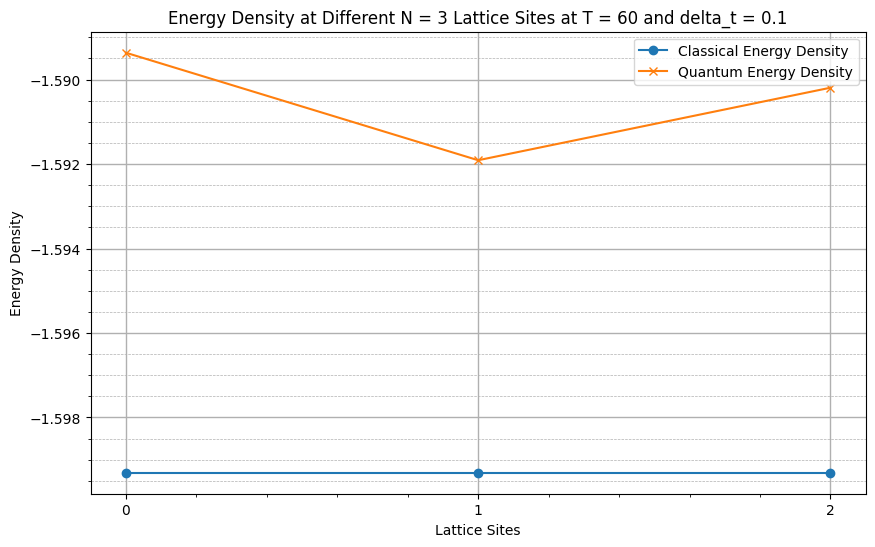

In [191]:
######### THE CALCULATION Energy Density from Quantum Circuit (quantum) &
### Compare with the energy density calculated from the true ground state (classical) #######
### order = 1 or 2 (order of Trotterization)
order = 1

### Define constants
N = 4 # Number of spins
a = 1.0  # Lattice spacing

# coupling constants 
g = 1.0

# Calculate Hamiltonian parameters
J = -3 * g**2 / 16
hz = 3 * g**2 / 8
hx = -2 / (a * g)**2    

# Total time & delta_t
T = 60
delta_t = 0.1
NT = int(T / delta_t)
# Prepare data storage
energy_density_classical_values = []
energy_density_quantum_values = []
print("="*50)
print(f"Total Time of Evolution   : {T}")
print(f"Total Number of Lattice Sites (Spins) : {N}")
print(f"delta_t                   : {delta_t}")
print(f"Trotter Steps             : {NT}")
print(f"Trotter Order             : {order}")
print("="*50)
# Get expectation value at all lattice sites
for lattice_site in range(N):

    # Hamiltonians (PBC)
    H_E = hamiltonian_elec(N, J, hz)
    H_M = hamiltonian_mag(N, hx)
    H_tot = H_E + H_M
    _, _, _, psi_0 = exact_ground_state(H_E)
    _, _, _, psi_final = exact_ground_state(H_tot)
    # Hamiltonian Density: Observable for the lattice site
    ham_observable = hamiltonian_density(lattice_site, J, hz, hx, N)

    # # Hamiltonians (Open)
    # H_E = hamiltonian_elec_open(N, J, hz)
    # H_M = hamiltonian_mag_open(N, hx)
    # H_tot = H_E + H_M
    # _, _, _, psi_0 = exact_ground_state(H_E)
    # _, _, _, psi_final = exact_ground_state(H_tot)
    # # Hamiltonian Density: Observable for the lattice site
    # ham_observable = hamiltonian_density_open(lattice_site, J, hz, hx, N)

    # Perform Quantum Adiabatic Evolution
    psi_final_quantum, quantum_circuit = adiabatic_evolution(T, NT, J, hz, hx, N, order)
       
    # Perform Classical Adiabatic Evolution (Exact Ground State Calculation)
    psi_final_classical = adiabatic_classical_ivp(psi_0, T, NT, H_E, H_M)

    # Classical energy density
    energy_density_matrix = ham_observable.to_matrix()
    energy_density_classical = np.real(np.conj(psi_final_classical) @ energy_density_matrix @ psi_final_classical)
    energy_density_classical_values.append(energy_density_classical)

    # Quantum energy density calculation using qiskit.primitives Estimator()
    # Aer Simulator    
    pm = generate_preset_pass_manager(1, AerSimulator())
    isa_qc = pm.run(quantum_circuit)
    isa_observable = ham_observable.apply_layout(isa_qc.layout)    
    estimator = Estimator()  # qiskit.primitives Estimator
    result = estimator.run(isa_qc, isa_observable, parameter_values=None, shots=None).result()
    energy_density_quantum = result.values[0]
    energy_density_quantum_values.append(energy_density_quantum)
    # Print on screen
    print("="*50)
    print(f"Lattice site = {lattice_site}")
    print("="*25)
    print(f"Classical Energy Density: {energy_density_classical}")
    print(f"Quantum Energy Density: {energy_density_quantum}")
    print("="*50)
    
# Plotting Figure
plt.figure(figsize=(10, 6))
lattice_sites = range(N)
plt.plot(lattice_sites, energy_density_classical_values, label='Classical Energy Density', marker='o')
plt.plot(lattice_sites, energy_density_quantum_values, label='Quantum Energy Density', marker='x')
plt.xlabel('Lattice Sites')
plt.ylabel('Energy Density')

# Set x-axis ticks to integer values only
plt.xticks(ticks=lattice_sites)

# Show minor ticks on y-axis
plt.minorticks_on()
plt.grid(True, which='minor', linestyle='--', axis='y', linewidth=0.5) 
plt.grid(True, which='major', linestyle='-', linewidth=1) 

plt.legend()
plt.title(f'Energy Density at Different N = {N} Lattice Sites at T = {T} and delta_t = {delta_t}')
plt.savefig(f"./quant_cl_EnergyDen_at_{N}_lattice_sites.pdf")
plt.show()

### Energy Density from the Individual Expectation Values Using Estimator

The hamiltonian density is,
$ H_i = h_z Z_i + J/2 (Z_i Z_{i+1} + Z_{i-1} Z_i) + hx/16 * (X_i - 3 Z_{i-1} X_i - 3 X_i Z_{i+1} + 9 Z_{i-1} X_i Z_{i+1}) $

The expectation value at the lattice site $i$ gives the energy density as:
$ \braket{H_i} = \braket{h_z Z_i + J/2 (Z_i Z_{i+1} + Z_{i-1} Z_i) + hx/16 * (X_i - 3 Z_{i-1} X_i - 3 X_i Z_{i+1} + 9 Z_{i-1} X_i Z_{i+1})} $

or,

$ \braket{H_i} = h_z \braket{Z_i} + J/2 ( \braket{Z_i Z_{i+1}} + \braket{Z_{i-1} Z_i}) + hx/16 * \braket{X_i} - 3 * hx/16 * \braket{Z_{i-1} X_i} - 3 *  hx/16 * \braket{X_i Z_{i+1}} + 9 *  hx/16 * \braket{Z_{i-1} X_i Z_{i+1}} \, . $

Here, we make use of the individual expectation values $<Z>$, $<ZZ>$, $<X>$, $<ZX>$, $<XZ>$  and $<ZXZ>$ to get the total energy density.

In [193]:
### DEFINE LATER USABLE FUNCTIONS
### OBSERVABLES
## takes care of periodic boundary condition
def wrap_index(index, num_qubits):
    """Wrap index around the lattice."""
    return index % num_qubits

def create_z_observable(index, num_qubits):
    index = wrap_index(index, num_qubits)
    return SparsePauliOp.from_sparse_list([('Z', [index], 1.0)], num_qubits=num_qubits)

def create_zz_observable(index1, index2, num_qubits):
    index1 = wrap_index(index1, num_qubits)
    index2 = wrap_index(index2, num_qubits)
    return SparsePauliOp.from_sparse_list([('ZZ', [index1, index2], 1.0)], num_qubits=num_qubits)

def create_zzz_observable(index1, index2, index3, num_qubits):
    index1 = wrap_index(index1, num_qubits)
    index2 = wrap_index(index2, num_qubits)
    index3 = wrap_index(index3, num_qubits)
    return SparsePauliOp.from_sparse_list([('ZZZ', [index1, index2, index3], 1.0)], num_qubits=num_qubits)

def create_x_observable(index, num_qubits):
    index = wrap_index(index, num_qubits)
    return SparsePauliOp.from_sparse_list([('X', [index], 1.0)], num_qubits=num_qubits)

def create_zx_observable(index1, index2, num_qubits):
    index1 = wrap_index(index1, num_qubits)
    index2 = wrap_index(index2, num_qubits)
    return SparsePauliOp.from_sparse_list([('ZX', [index1, index2], 1.0)], num_qubits=num_qubits)

def create_xz_observable(index1, index2, num_qubits):
    index1 = wrap_index(index1, num_qubits)
    index2 = wrap_index(index2, num_qubits)
    return SparsePauliOp.from_sparse_list([('XZ', [index1, index2], 1.0)], num_qubits=num_qubits)

def create_zxz_observable(index1, index2, index3, num_qubits):
    index1 = wrap_index(index1, num_qubits)
    index2 = wrap_index(index2, num_qubits)
    index3 = wrap_index(index3, num_qubits)
    return SparsePauliOp.from_sparse_list([('ZXZ', [index1, index2, index3], 1.0)], num_qubits=num_qubits)
    
### Functions to Measure Expectation Value [Exact and Statistical One]
def get_exact_expectation_value(qc, observable):
    # # EstimatorV2 [Exact without Noise]: 
    # ## Ref: https://docs.quantum.ibm.com/guides/simulate-with-qiskit-aer
    aer_sim = AerSimulator(method="automatic")
    pm = generate_preset_pass_manager(1, AerSimulator())
    isa_qc = pm.run(qc)
    isa_observable = observable.apply_layout(isa_qc.layout)
    # # estimator_exact = AerEstimator()  
    # from qiskit.primitives import StatevectorEstimator
    # estimator_exact = StatevectorEstimator()  
    # pubs_exact = (isa_qc, isa_observable)
    # job_exact = estimator_exact.run([pubs_exact])
    # result_exact = job_exact.result()
    # pub_result_exact = result_exact[0]
    # exact_exp = float(pub_result_exact.data.evs)

    ## ## USING QISKIT.PRIMITIVES ESTIMATOR 
    ## (SHOTS = NONE Gives Exact: https://docs.quantum.ibm.com/api/qiskit/qiskit.primitives.Estimator)
    est_exact = Estimator() 
    job_exact = est_exact.run(isa_qc, isa_observable, parameter_values=None, shots=None)
    result_exact = job_exact.result()
    exact_exp = result_exact.values[0]

    print(f"Computed exact expectation value for observable: {observable}")
    return exact_exp
    
def measure_expectation_value(qc, observable, shots, exact_cache):    
    # Aer Simulator    
    aer_sim = AerSimulator(method="automatic")
    pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
    isa_qc = pm.run(qc)
    isa_observable = observable.apply_layout(isa_qc.layout)
    
    # Check if the exact value is already computed
    obs_key = str(observable)
    if obs_key in exact_cache:
        print(f"Using cached exact expectation value for observable: {observable}")
        exact_exp = exact_cache[obs_key]
    else:
        exact_exp = get_exact_expectation_value(qc, observable)
        exact_cache[obs_key] = exact_exp
    
    # Estimator (with shots): for Statistical Uncertainty
    ## Ref: https://docs.quantum.ibm.com/api/qiskit/qiskit.primitives.Estimator
    est_with_shots = Estimator() 
    est_with_shots.set_options(shots=shots)
    job_with_shots = est_with_shots.run(isa_qc, isa_observable, parameter_values=None, shots=shots)
    result_with_shots = job_with_shots.result()
    shots_exp = result_with_shots.values[0]

    return exact_exp, shots_exp
  
def measure_x_expectation_value(qc, index, shots, exact_cache):
    qc.h(index)
        
    num_qubits = qc.num_qubits
    z_obs = create_z_observable(index, num_qubits)   
       
    return measure_expectation_value(qc, z_obs, shots, exact_cache)

def measure_zx_expectation_value(qc, index1, index2, shots, exact_cache):
    qc.h(index2)
    
    num_qubits = qc.num_qubits
    zz_obs = create_zz_observable(index1, index2, num_qubits)
    
    return measure_expectation_value(qc, zz_obs, shots, exact_cache)

def measure_xz_expectation_value(qc, index1, index2, shots, exact_cache):
    qc.h(index1)
    
    num_qubits = qc.num_qubits
    zz_obs = create_zz_observable(index1, index2, num_qubits)

    return measure_expectation_value(qc, zz_obs, shots, exact_cache)

def measure_zxz_expectation_value(qc, index1, index2, index3, shots, exact_cache):
    qc.h(index2)
    
    num_qubits = qc.num_qubits
    zzz_obs = create_zzz_observable(index1, index2, index3, num_qubits)
    
    return measure_expectation_value(qc, zzz_obs, shots, exact_cache)

def calculate_energy_density_with_error(psi_final_classical, qc, lattice_site, shots_list):
    exact_cache = {}
    quantum_energy_densities_exact_indSum = []
    quantum_energy_densities_exact_All = []
    quantum_energy_densities_shots_indSum = []
    quantum_energy_densities_shots_All = []
    classical_energy_densities_indSum = []
    
    N = qc.num_qubits
    # Hamiltonian Density: Observable
    ham_den_obs = hamiltonian_density(site, J, hz, hx, N)

    # ham_den_obs = hamiltonian_density_open(site, J, hz, hx, N)
       
    for shots in shots_list:
        print(f"Calculating expectation values and then energy density with error for {shots} shots.")

        ## Calculate Quantum Energy Density Using Individual Sum
        # <z> 
        z_exact, z_shots = measure_expectation_value(qc, create_z_observable(lattice_site, N), shots, exact_cache) 
        # Z_i Z_{i+1} and Z_{i-1}Z_i
        zizi1_exact, zizi1_shots = measure_expectation_value(qc, create_zz_observable(lattice_site, lattice_site+1, N), shots, exact_cache)
        zi1zi_exact, zi1zi_shots = measure_expectation_value(qc, create_zz_observable(lattice_site-1, lattice_site, N), shots, exact_cache)
        # <ZZ> = 1/2 * ( Z_i Z_{i+1} +  Z_{i-1}Z_i )
        zz_exact, zz_shots = 1/2 * (zizi1_exact + zi1zi_exact), 1/2 * (zizi1_shots + zi1zi_shots)
        # <x>
        x_exact, x_shots = measure_x_expectation_value(qc, lattice_site, shots, exact_cache)
        # <z_{i-1}x_i>
        zx_exact, zx_shots = measure_zx_expectation_value(qc, lattice_site-1, lattice_site, shots, exact_cache)
        # <x_iz_{i+1}>
        xz_exact, xz_shots = measure_xz_expectation_value(qc, lattice_site, lattice_site+1, shots, exact_cache)
        # <z_{i-1}x_i z_{i+1}>
        zxz_exact, zxz_shots = measure_zxz_expectation_value(qc, lattice_site-1, lattice_site, lattice_site+1, shots, exact_cache)
        
        ## CALCULATE THE QUANTUM ENERGY DENSIT
        quantum_energy_density_exact_indSum = hz * z_exact + J * zz_exact + hx/16 * x_exact - 3 * hx/16 * zx_exact - 3 * hx/16 * xz_exact + 9 * hx/16 * zxz_exact
        quantum_energy_density_shots_indSum =  hz * z_shots + J * zz_shots + hx/16 * x_shots - 3 * hx/16 * zx_shots - 3 * hx/16 * xz_shots + 9 * hx/16 * zxz_shots     
        # OUTPUT 
        print("="*20)
        print(f"Exact Energy Density (Ind Sum)= {quantum_energy_density_exact_indSum}, Exact Energy Density with Shots  (Ind Sum)= {quantum_energy_density_shots_indSum}")
        print("="*20)
        quantum_energy_densities_exact_indSum.append(quantum_energy_density_exact_indSum)
        quantum_energy_densities_shots_indSum.append(quantum_energy_density_shots_indSum)

         ## Calculate Quantum Energy Density Using All Together
        quantum_energy_density_exact_All, quantum_energy_density_shots_All = measure_expectation_value(qc, ham_den_obs, shots, exact_cache)
        quantum_energy_densities_exact_All.append(quantum_energy_density_exact_All)
        quantum_energy_densities_shots_All.append(quantum_energy_density_shots_All)
        
        # OUTPUT 
        print("="*20)
        print(f"Exact Energy Density (Together)= {quantum_energy_density_exact_All}, Exact Energy Density with Shots  (Together)= {quantum_energy_density_shots_All}")
        print("="*20)
        
        ## CALCULATE THE CLASSICAL ENERGY DENSITY
        z_exp = np.real(np.conj(psi_final_classical) @ create_z_observable(lattice_site, N).to_matrix() @ psi_final_classical)
        zz_exp = 0.5 * (np.real(np.conj(psi_final_classical) @ create_zz_observable(lattice_site, lattice_site+1, N).to_matrix() @ psi_final_classical) +
                     np.real(np.conj(psi_final_classical) @ create_zz_observable(lattice_site-1, lattice_site, N).to_matrix() @ psi_final_classical))
        x_exp = np.real(np.conj(psi_final_classical) @ create_x_observable(lattice_site, N).to_matrix() @ psi_final_classical)
        zx_exp = np.real(np.conj(psi_final_classical) @ create_zx_observable(lattice_site-1, lattice_site, N).to_matrix() @ psi_final_classical)
        xz_exp = np.real(np.conj(psi_final_classical) @ create_xz_observable(lattice_site, lattice_site+1, N).to_matrix() @ psi_final_classical)
        zxz_exp = np.real(np.conj(psi_final_classical) @ create_zxz_observable(lattice_site-1, lattice_site, lattice_site+1, N).to_matrix() @ psi_final_classical)
     
        energy_density_classical_indSum = hz * z_exp + J * zz_exp + hx/16 * x_exp - 3 * hx/16 * zx_exp - 3 * hx/16 * xz_exp + 9 * hx/16 * zxz_exp       
        classical_energy_densities_indSum.append(energy_density_classical_indSum)

    quantum_energy_densities_shots_indSum = np.array(quantum_energy_densities_shots_indSum)
    stat_error_indSum = np.std(quantum_energy_densities_shots_indSum, axis=0) / np.sqrt(len(shots_list))

    quantum_energy_densities_shots_All = np.array(quantum_energy_densities_shots_All)
    stat_error_All = np.std(quantum_energy_densities_shots_All, axis=0) / np.sqrt(len(shots_list))
    
    print("="*20)
    print(f"Mean Quantum Energy Density (Ind Sum): {np.mean(quantum_energy_densities_exact_indSum)}")
    print(f"Standard errors (ind sum): {stat_error_indSum}")

    print(f"Mean Quantum Energy Density (Together): {np.mean(quantum_energy_densities_exact_All)}")
    print(f"Standard errors (Together): {stat_error_All}")
    print("="*20)
    return np.mean(quantum_energy_densities_exact_indSum), np.mean(quantum_energy_densities_exact_All), np.mean(classical_energy_densities_indSum), stat_error_indSum, stat_error_All

=========================START=========================
Total No. of Spins = 3
Coupling (g) = 1.0
Total Evolution Time (T) = 60
delta_t = 0.1
Trotter Steps = 600
Quantum Adiabatic & Classical Exact Wave Function Overlap: 99.295%
Classical Adiabatic & Classical Exact Wave Function Overlap: 99.932%
Quantum Adiabatic & Classical Adiabatic Wave Function Overlap: 99.578%
Lattice Site: 0
Calculating expectation values and then energy density with error for 10 shots.
Computed exact expectation value for observable: SparsePauliOp(['IIZ'],
              coeffs=[1.+0.j])
Computed exact expectation value for observable: SparsePauliOp(['IZZ'],
              coeffs=[1.+0.j])
Computed exact expectation value for observable: SparsePauliOp(['ZIZ'],
              coeffs=[1.+0.j])
Using cached exact expectation value for observable: SparsePauliOp(['IIZ'],
              coeffs=[1.+0.j])
Using cached exact expectation value for observable: SparsePauliOp(['ZIZ'],
              coeffs=[1.+0.j])
Using cached

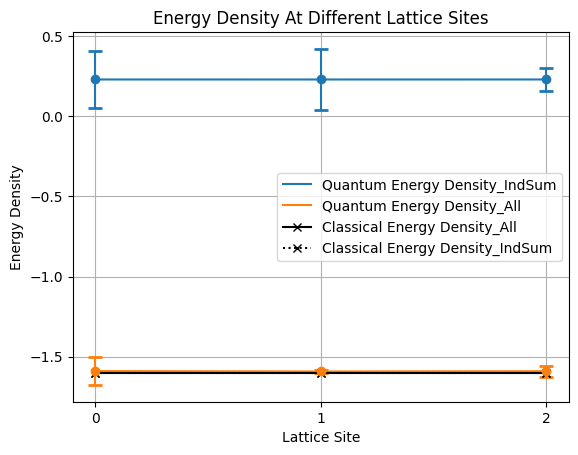

In [194]:
### THE QUANTUM ENERGY DENSITY WITH THE STATISTICAL UNCERTAINTY #######
### order = 1 or 2 (order of Trotterization)
order = 1

### Define constants
N = 3  # Number of spins
a = 1.0  # Lattice spacing

# coupling constants 
g = 1.0

# Calculate Hamiltonian parameters
J = -3 * g**2 / 16
hz = 3 * g**2 / 8
hx = -2 / (a * g)**2    

# Total time & delta_t
T = 60

delta_t = 0.1

# Trotter Steps
NT = int(T/delta_t)

print("="*25 + "START" + "="*25)
print(f"Total No. of Spins = {N}")
print(f"Coupling (g) = {g}")
print(f"Total Evolution Time (T) = {T}")
print(f"delta_t = {delta_t}")
print(f"Trotter Steps = {NT}")
print("="*50)

# Hamiltonians (PBC)
H_E = hamiltonian_elec(N, J, hz)
H_M = hamiltonian_mag(N, hx)

# # Hamiltonians (Open)
# H_E = hamiltonian_elec_open(N, J, hz)
# H_M = hamiltonian_mag_open(N, hx)

# Total Hamiltonian
H_tot = H_E + H_M

# ## Calculate the ground state of H_E (for classical adiabatic)
_, _, _, psi_0 = exact_ground_state(H_E)

## Perform Quantum Adiabatic Evolution
psi_final_quantum, quantum_circuit = adiabatic_evolution(T, NT, J, hz, hx, N, order)

## Perform Classical Adiabatic Evolution
psi_final_classical = adiabatic_classical_ivp(psi_0, T, NT, H_E, H_M) # N_steps = NT

# Total Hamiltonian Solutions: Energies and States: EXACT
eigenvals, eigenvecs, energy_realgs, psi_realgs = exact_ground_state(H_tot)

print(f"Quantum Adiabatic & Classical Exact Wave Function Overlap: {calc_overlap(psi_final_quantum, psi_realgs)*100:.3f}%")
print(f"Classical Adiabatic & Classical Exact Wave Function Overlap: {calc_overlap(psi_realgs, psi_final_classical)*100:.3f}%")
print(f"Quantum Adiabatic & Classical Adiabatic Wave Function Overlap: {calc_overlap(psi_final_quantum, psi_final_classical)*100:.3f}%")

# copy the quantum circuit
qc = quantum_circuit.copy()

# Define shot values to test
shots_list = [10, 1000, 100000]

# lattice sites
lattice_sites = range(N)

# Collect energy densities and standard errors
quantum_energies_indSum = []
quantum_energies_All = []
classical_energies_indSum = []
classical_energies_All = []
stat_errors_indSum = []
stat_errors_All = []

for site in lattice_sites:   
    print("="*50)
    print(f"Lattice Site: {site}")
    
    # Hamiltonian Density: Observable
    ham_den_obs = hamiltonian_density(site, J, hz, hx, N)
    energy_density_matrix = ham_den_obs.to_matrix()
    
    # classical energy density
    classical_energy_density_All = np.real(np.conj(psi_final_classical) @ energy_density_matrix @ psi_final_classical)
    
    # quantum energy density (and classical also using individual) and statistical errors
    quantum_energy_density_exact_indSum, quantum_energy_density_exact_All, classical_energy_density_indSum, stat_error_indSum, stat_error_All = calculate_energy_density_with_error(psi_final_classical, qc, site, shots_list)
    
    quantum_energies_indSum.append(quantum_energy_density_exact_indSum)
    classical_energies_indSum.append(classical_energy_density_indSum)

    quantum_energies_All.append(quantum_energy_density_exact_All)
    classical_energies_All.append(classical_energy_density_All)
    
    stat_errors_indSum.append(stat_error_indSum)  

    stat_errors_All.append(stat_error_All)  

    # Sys Error
    # sys_error = np.abs((energy_density_quantum - energy_density_classical)/energy_density_classical)
        
    print("="*25)
    print(f"Quantum Energy Density Exact (Individual Summed) = {quantum_energy_density_exact_indSum}")
    print(f"Classical Energy Density (Individual Summed) = {classical_energy_density_indSum}")
    print(f"Quantum Energy Density Exact (Together) = {quantum_energy_density_exact_All}")
    print(f"Classical Energy Density (Together) = {classical_energy_density_All}")    
    print("="*25)

# Plot results
plt.plot(lattice_sites, quantum_energies_indSum, '-', label='Quantum Energy Density_IndSum', color='tab:blue')
plt.errorbar(lattice_sites, quantum_energies_indSum, yerr=stat_errors_indSum, fmt='o', capsize=5, capthick=2, color='tab:blue')

plt.plot(lattice_sites, quantum_energies_All, '-', label='Quantum Energy Density_All', color='tab:orange')
plt.errorbar(lattice_sites, quantum_energies_All, yerr=stat_errors_All, fmt='o', capsize=5, capthick=2, color='tab:orange')

plt.plot(lattice_sites, classical_energies_All, '-', marker='x', color='k', label='Classical Energy Density_All')  # Solid black line
plt.plot(lattice_sites, classical_energies_indSum, ':', marker='x', color='k', label='Classical Energy Density_IndSum')  # Dotted black line

plt.xlabel('Lattice Site')
plt.ylabel('Energy Density')

# Set x-ticks to be exactly at the lattice sites
plt.xticks(lattice_sites)

plt.title('Energy Density At Different Lattice Sites')
plt.grid(True)
plt.legend()
plt.savefig('energy_density_comparison.png', dpi=300) # save the figure
plt.show()

In [ ]:
# END #